# Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They need to analyze the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.


## Data Description

* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* Company: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* Estimated Shares Outstanding: Company's stock currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)
 

## Importing necessary libraries and data

In [109]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

In [112]:
# Make a copy of train dataset
df = data.copy()

In [113]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 200)

In [114]:
# viewing a random sample of the dataset
np.random.seed(1)
data.sample(200)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.550,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.310,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.520,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.280,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.230,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.970,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.560,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.790,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.140,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.260,4.283628e+08,14.814159,4.218620


In [115]:
# check number of rows and columns
data.shape

(340, 15)

* The dataset has 340 rows and 15 columns.

### Check for any missing data

In [116]:
#check for missing data
data.isna().sum().sort_values(ascending=False)

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing data

### Let's check the duplicate data.

In [117]:
data[data.duplicated()].count()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no duplicates

#### Let us check the data type of the columns

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are four object type columns which is relatable.

### Lets check the different unique values for the object columns

In [119]:
# get the column names that are object type
object_columns = list(data.select_dtypes(include=['object']).columns)
object_columns

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

In [120]:
data.describe(include=['object']).T

,count,unique,top,freq
Ticker Symbol,340,340,UNM,1
Security,340,340,EOG Resources,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


- As expected there are 340 unique Ticker Symbol and Security.
- There are 11 unique GICS Sector.
- Under the 11 unique GICS sectors there are 104 GISC Sub Industry.

In [121]:
data.groupby(['GICS Sector']).size().sort_values(ascending=False).reset_index()

,GICS Sector,0
0,Industrials,53
1,Financials,49
2,Consumer Discretionary,40
3,Health Care,40
4,Information Technology,33
5,Energy,30
6,Real Estate,27
7,Utilities,24
8,Materials,20
9,Consumer Staples,19


- Among the sectors Industrials (53)is the largest group, followed by Financials (49)
- Consumer Discretionary and Health Care are among the top four with 40 each

In [122]:
data.groupby(['GICS Sector','GICS Sub Industry']).size().sort_values(ascending=False).reset_index()

,GICS Sector,GICS Sub Industry,0
0,Energy,Oil & Gas Exploration & Production,16
1,Real Estate,REITs,14
2,Industrials,Industrial Conglomerates,14
3,Information Technology,Internet Software & Services,12
4,Utilities,Electric Utilities,12
5,Health Care,Health Care Equipment,11
6,Utilities,MultiUtilities,11
7,Financials,Banks,10
8,Financials,Property & Casualty Insurance,8
9,Financials,Diversified Financial Services,7


- Among the sectors "Oil & Gas Exploration & Production" (16) is the largest group, followed by REITs (14) and Industrial Conglomerates (14)
- "Internet Software & Services" and Electric Utilities	 are among the top five with 12 each

In [123]:
# fixing column names
data.columns = [c.replace("/", "_") for c in data.columns]

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P_E R

In [125]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P_E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


## Exploratory Data Analysis (EDA)

#### Univariate Analysis

#### Functions for plotting

In [126]:
 #function to plot a boxplot and a histogram along the same scale.

# import the library for labelling
import matplotlib.patheffects as path_effects

# import the library for labelling
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='black'),size=15)
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
            
def box_and_histogram(column,  figsize=(10,10), bins = None):
    """ Boxplot and histogram together, with median labels on boxplot
    df_series: dataframe column
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    color of mean is green and median is black
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                            ) # creating the 2 subplots
    box_plot = sns.boxplot(column, ax=ax_box2,showmeans=True, color='red')
    add_median_labels(box_plot.axes)
 

    sns.distplot(column, kde=F, bins=bins) if bins else sns.distplot(column, kde=True, ) # For histogram
    ax_hist2.axvline(np.mean(column), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(column), color='black', linestyle='-') # Add median to the histogram

    
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="RdYlBu",
        order=data[feature].value_counts().index
    
       
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot   
    

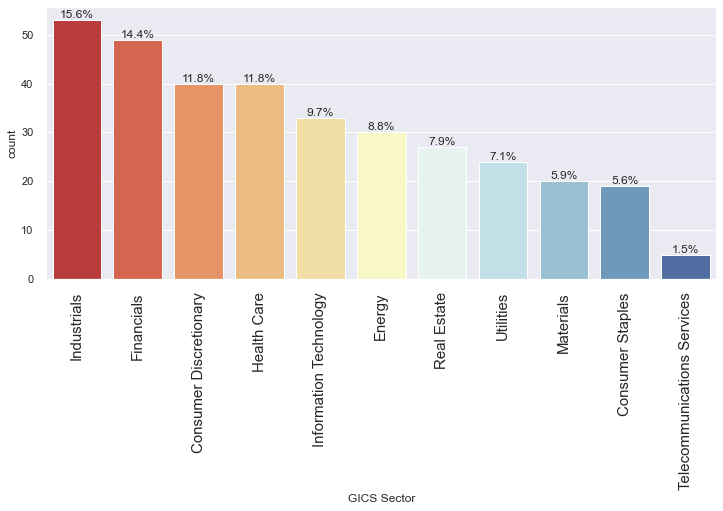

In [127]:
# let's explore discounts further
labeled_barplot(data, "GICS Sector", perc=True)

- Industrials and Financials are the top GISC Sector, each having 15.6 and 14.4 % respectively

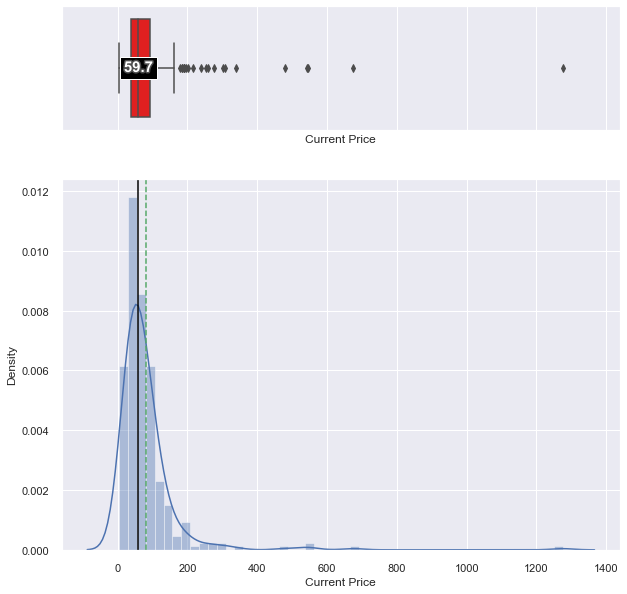

In [128]:
# Let's visualize the data for ['Current Price']
columns =  ['Current Price']
for col in columns:
    box_and_histogram(data[col])

- Current Price is right skewed as expected, and there are outliers as well as expected

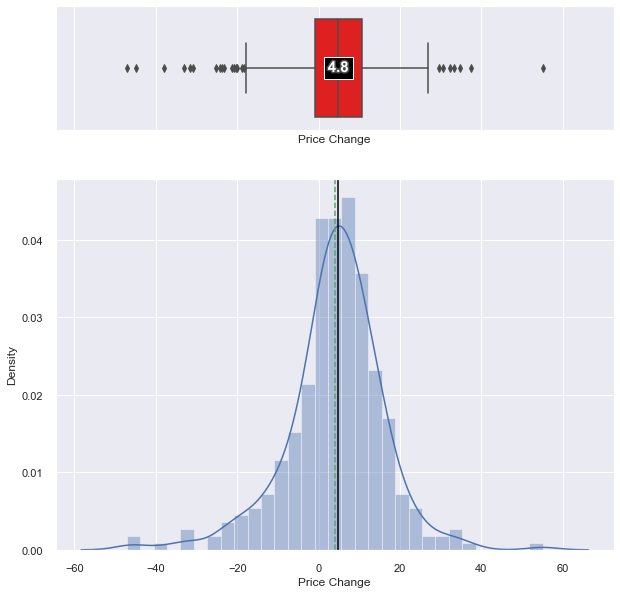

In [129]:
# Let's visualize the data for ['Price Change']
columns =  ['Price Change']
for col in columns:
    box_and_histogram(data[col])

- Percentage change in the stock price in 13 weeks is almost normally distributed

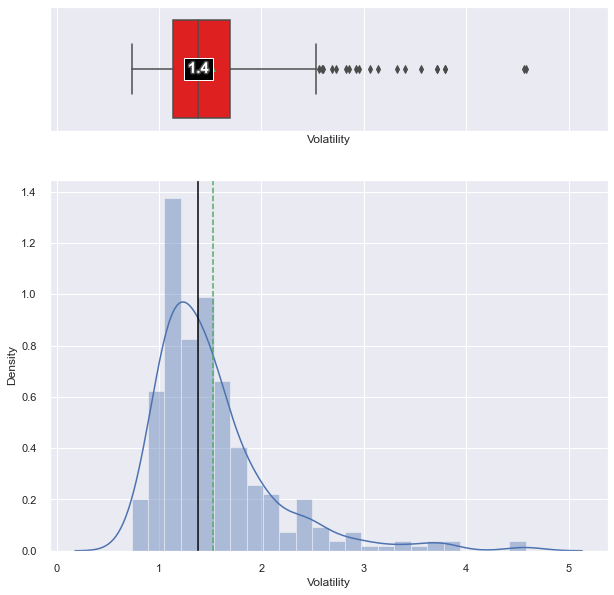

In [130]:
# Let's visualize the data for ['Volatility']
columns =  ['Volatility']
for col in columns:
    box_and_histogram(data[col])

- Volatility is right tailed, some stock have had large price movements in the last 13 weeks.

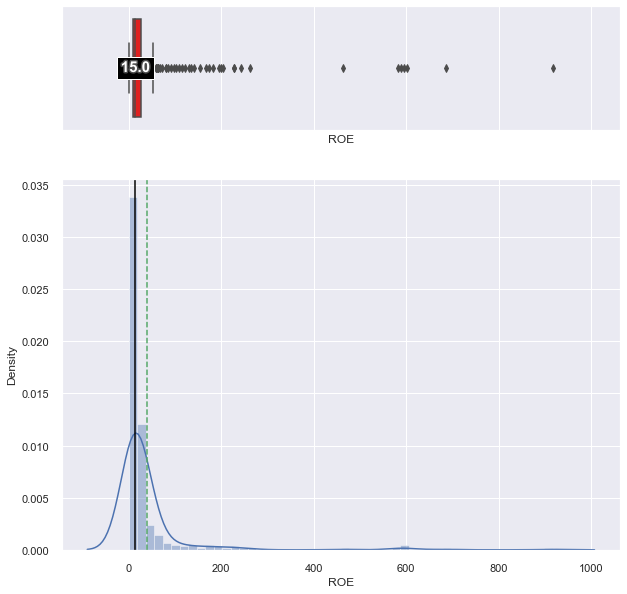

In [131]:
# Let's visualize the data for ['ROE']
columns =  ['ROE']
for col in columns:
    box_and_histogram(data[col])

- ROE is right skewed

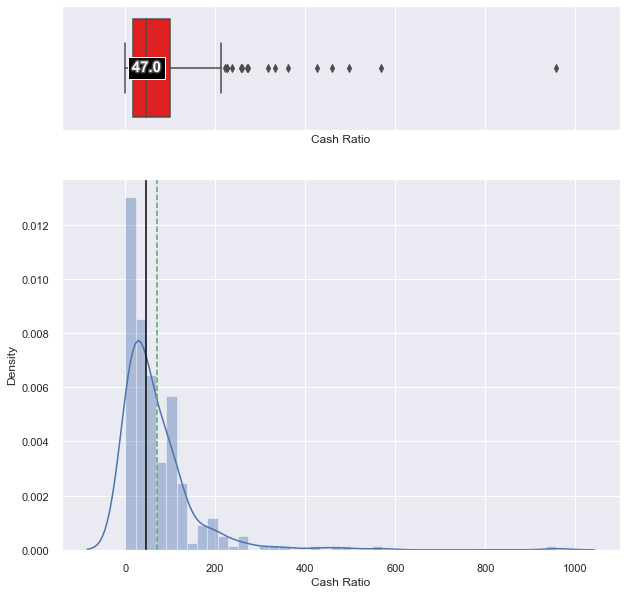

In [132]:
# Let's visualize the data for ['Cash Ratio']
columns =  ['Cash Ratio']
for col in columns:
    box_and_histogram(data[col])

- Cash Ratio is also right skewed

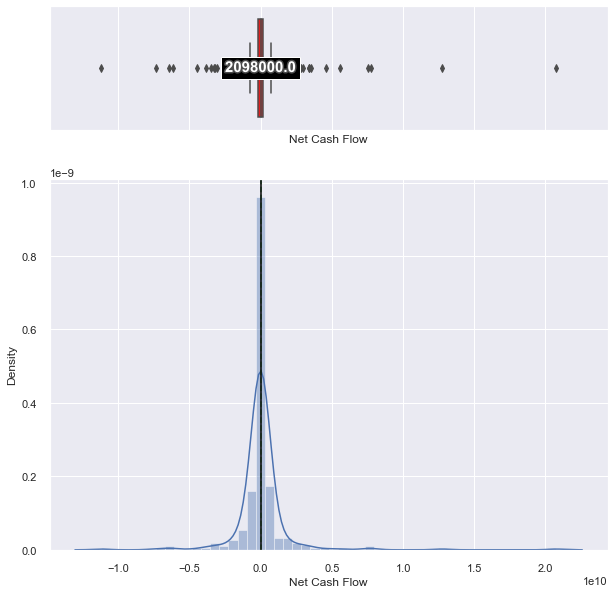

In [133]:
# Let's visualize the data for ['Net Cash Flow']
columns =  ['Net Cash Flow']
for col in columns:
    box_and_histogram(data[col])

- Net Cash Flow is close to Normal distribution with a slight right skewed.

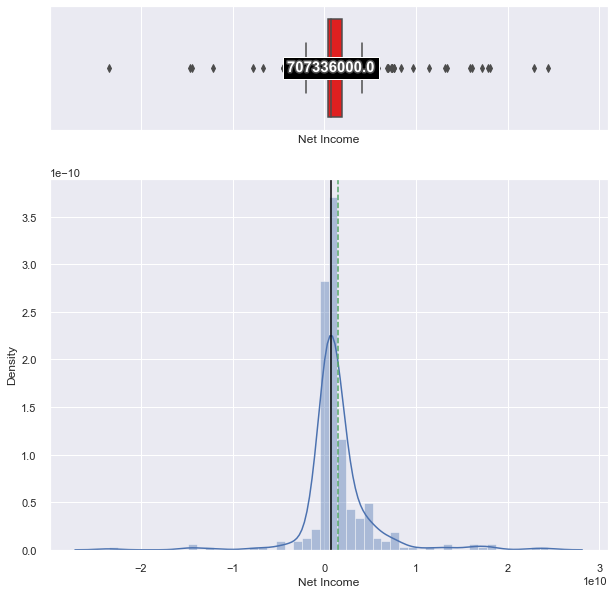

In [134]:
# Let's visualize the data for ['Net Income']
columns =  ['Net Income']
for col in columns:
    box_and_histogram(data[col])

- Net Income is close to Normal distribution

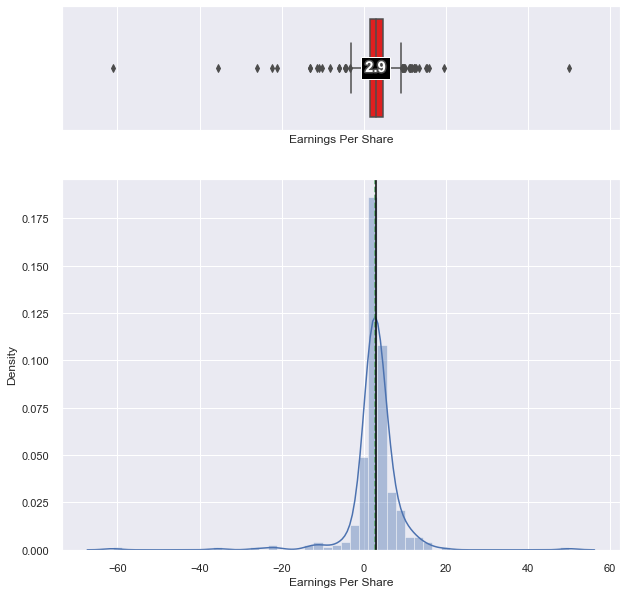

In [135]:
# Let's visualize the data for ['Earnings Per Share']
columns =  ['Earnings Per Share']
for col in columns:
    box_and_histogram(data[col])

- Earnings Per Share is Slightly left skewed

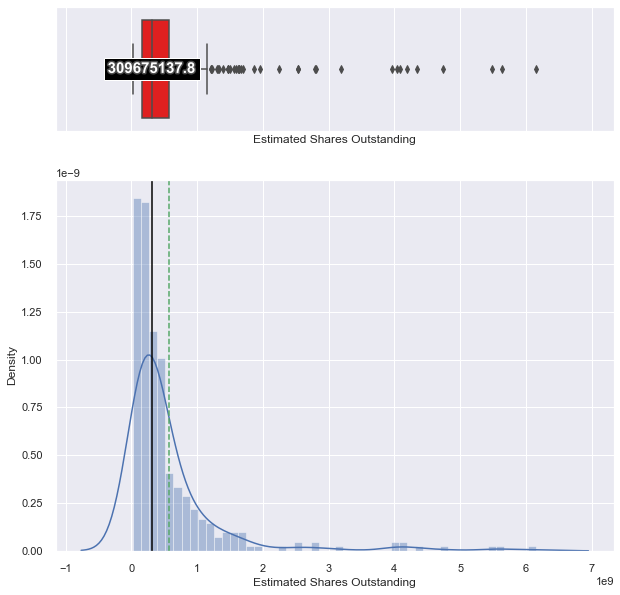

In [136]:
# Let's visualize the data for ['Estimated Shares Outstanding']
columns =  ['Estimated Shares Outstanding']
for col in columns:
    box_and_histogram(data[col])

- Estimated Shares Outstanding is right skewed

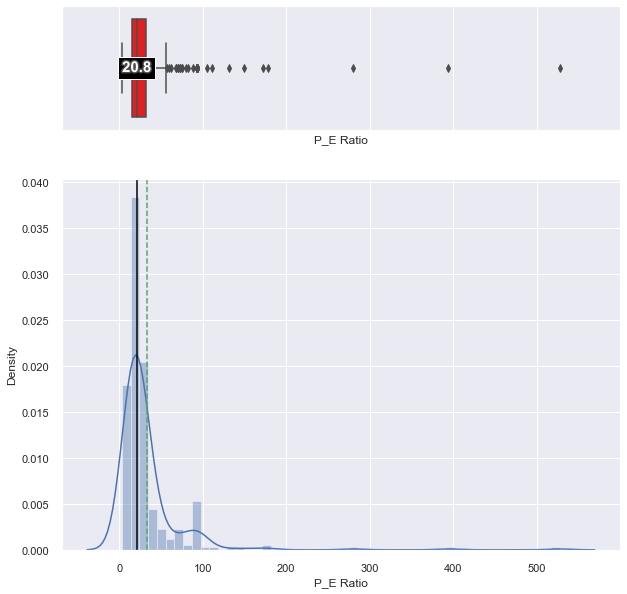

In [137]:
# Let's visualize the data for ['P_E Ratio']
columns =  ['P_E Ratio']
for col in columns:
    box_and_histogram(data[col])

- P/E ratio is right skewed

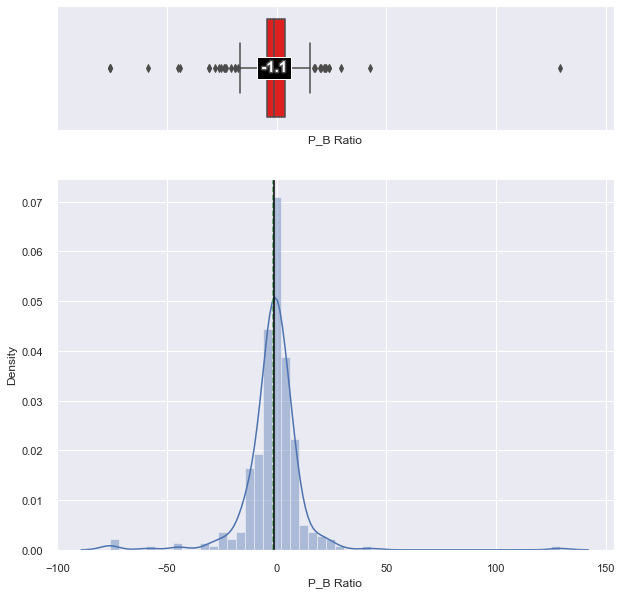

In [138]:
# Let's visualize the data for ['P_B Ratio']
columns =  ['P_B Ratio']
for col in columns:
    box_and_histogram(data[col])

- P/B ratio is close to normal distribution

In [139]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P_E Ratio',
 'P_B Ratio']

In [140]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

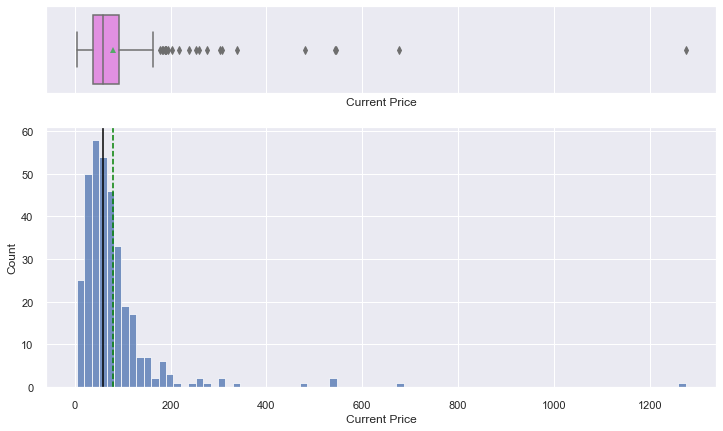

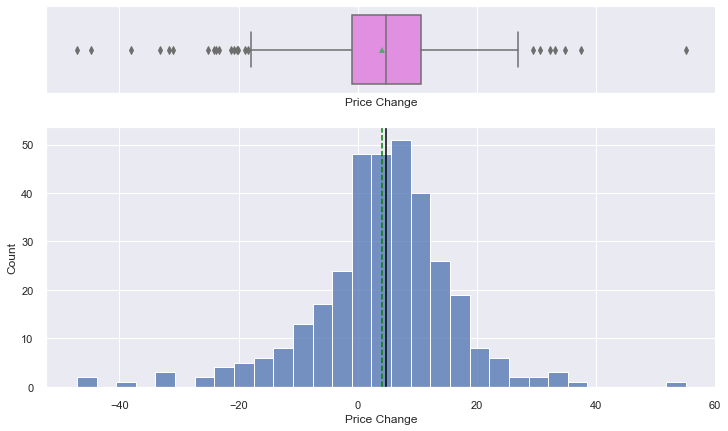

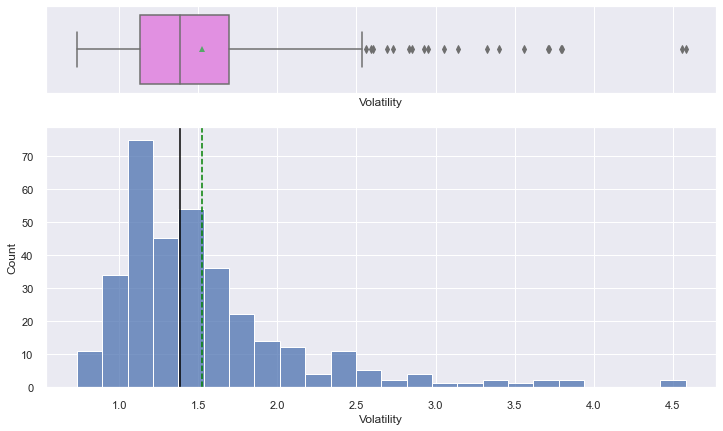

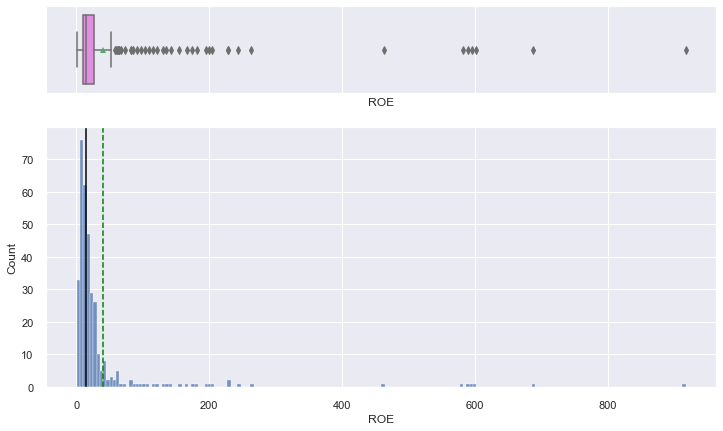

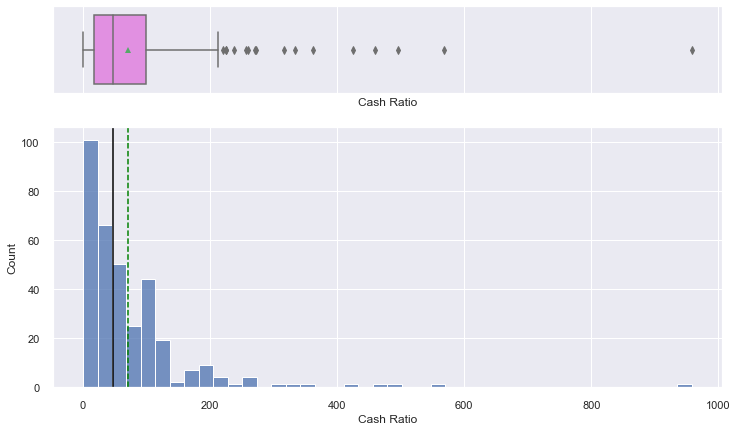

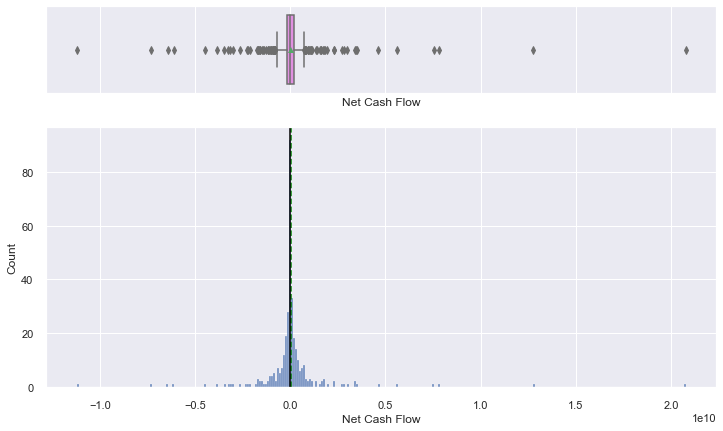

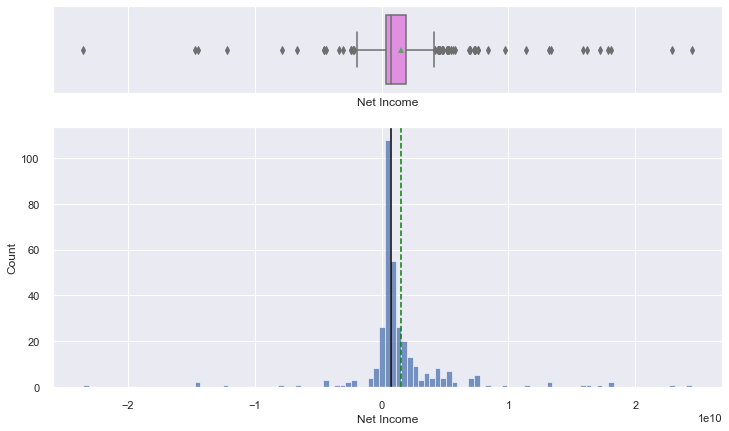

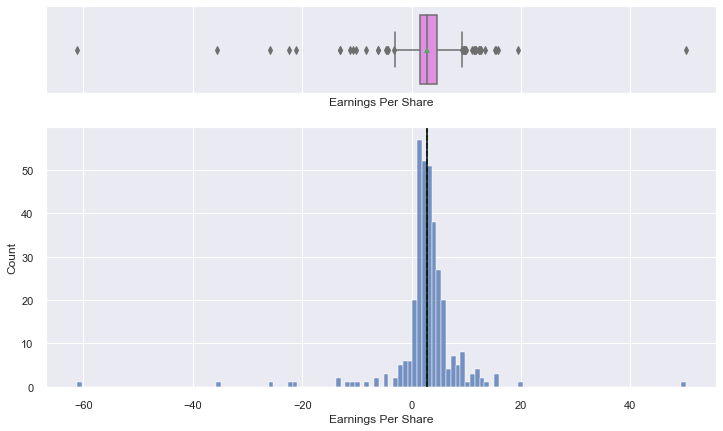

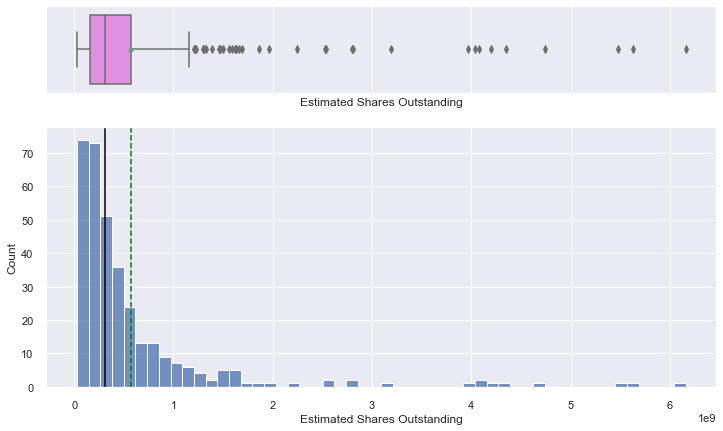

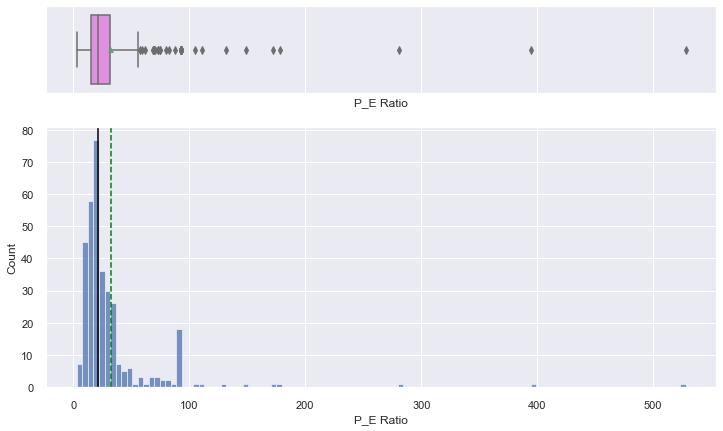

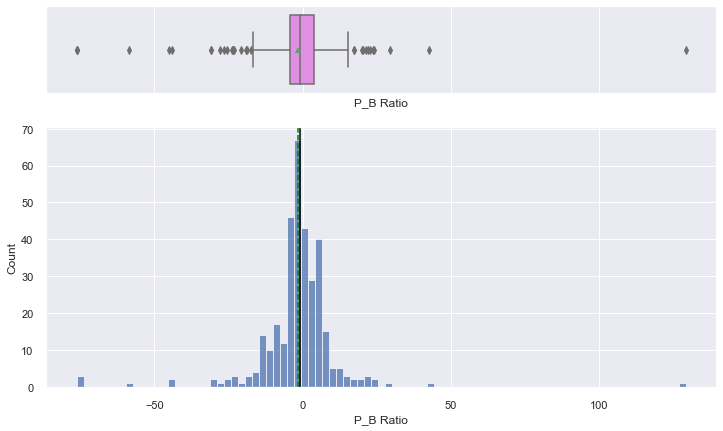

In [141]:
for item in num_col:
    histogram_boxplot(data, item)

- A similar view of the various columns as done earlier

### Bivariate Analysis

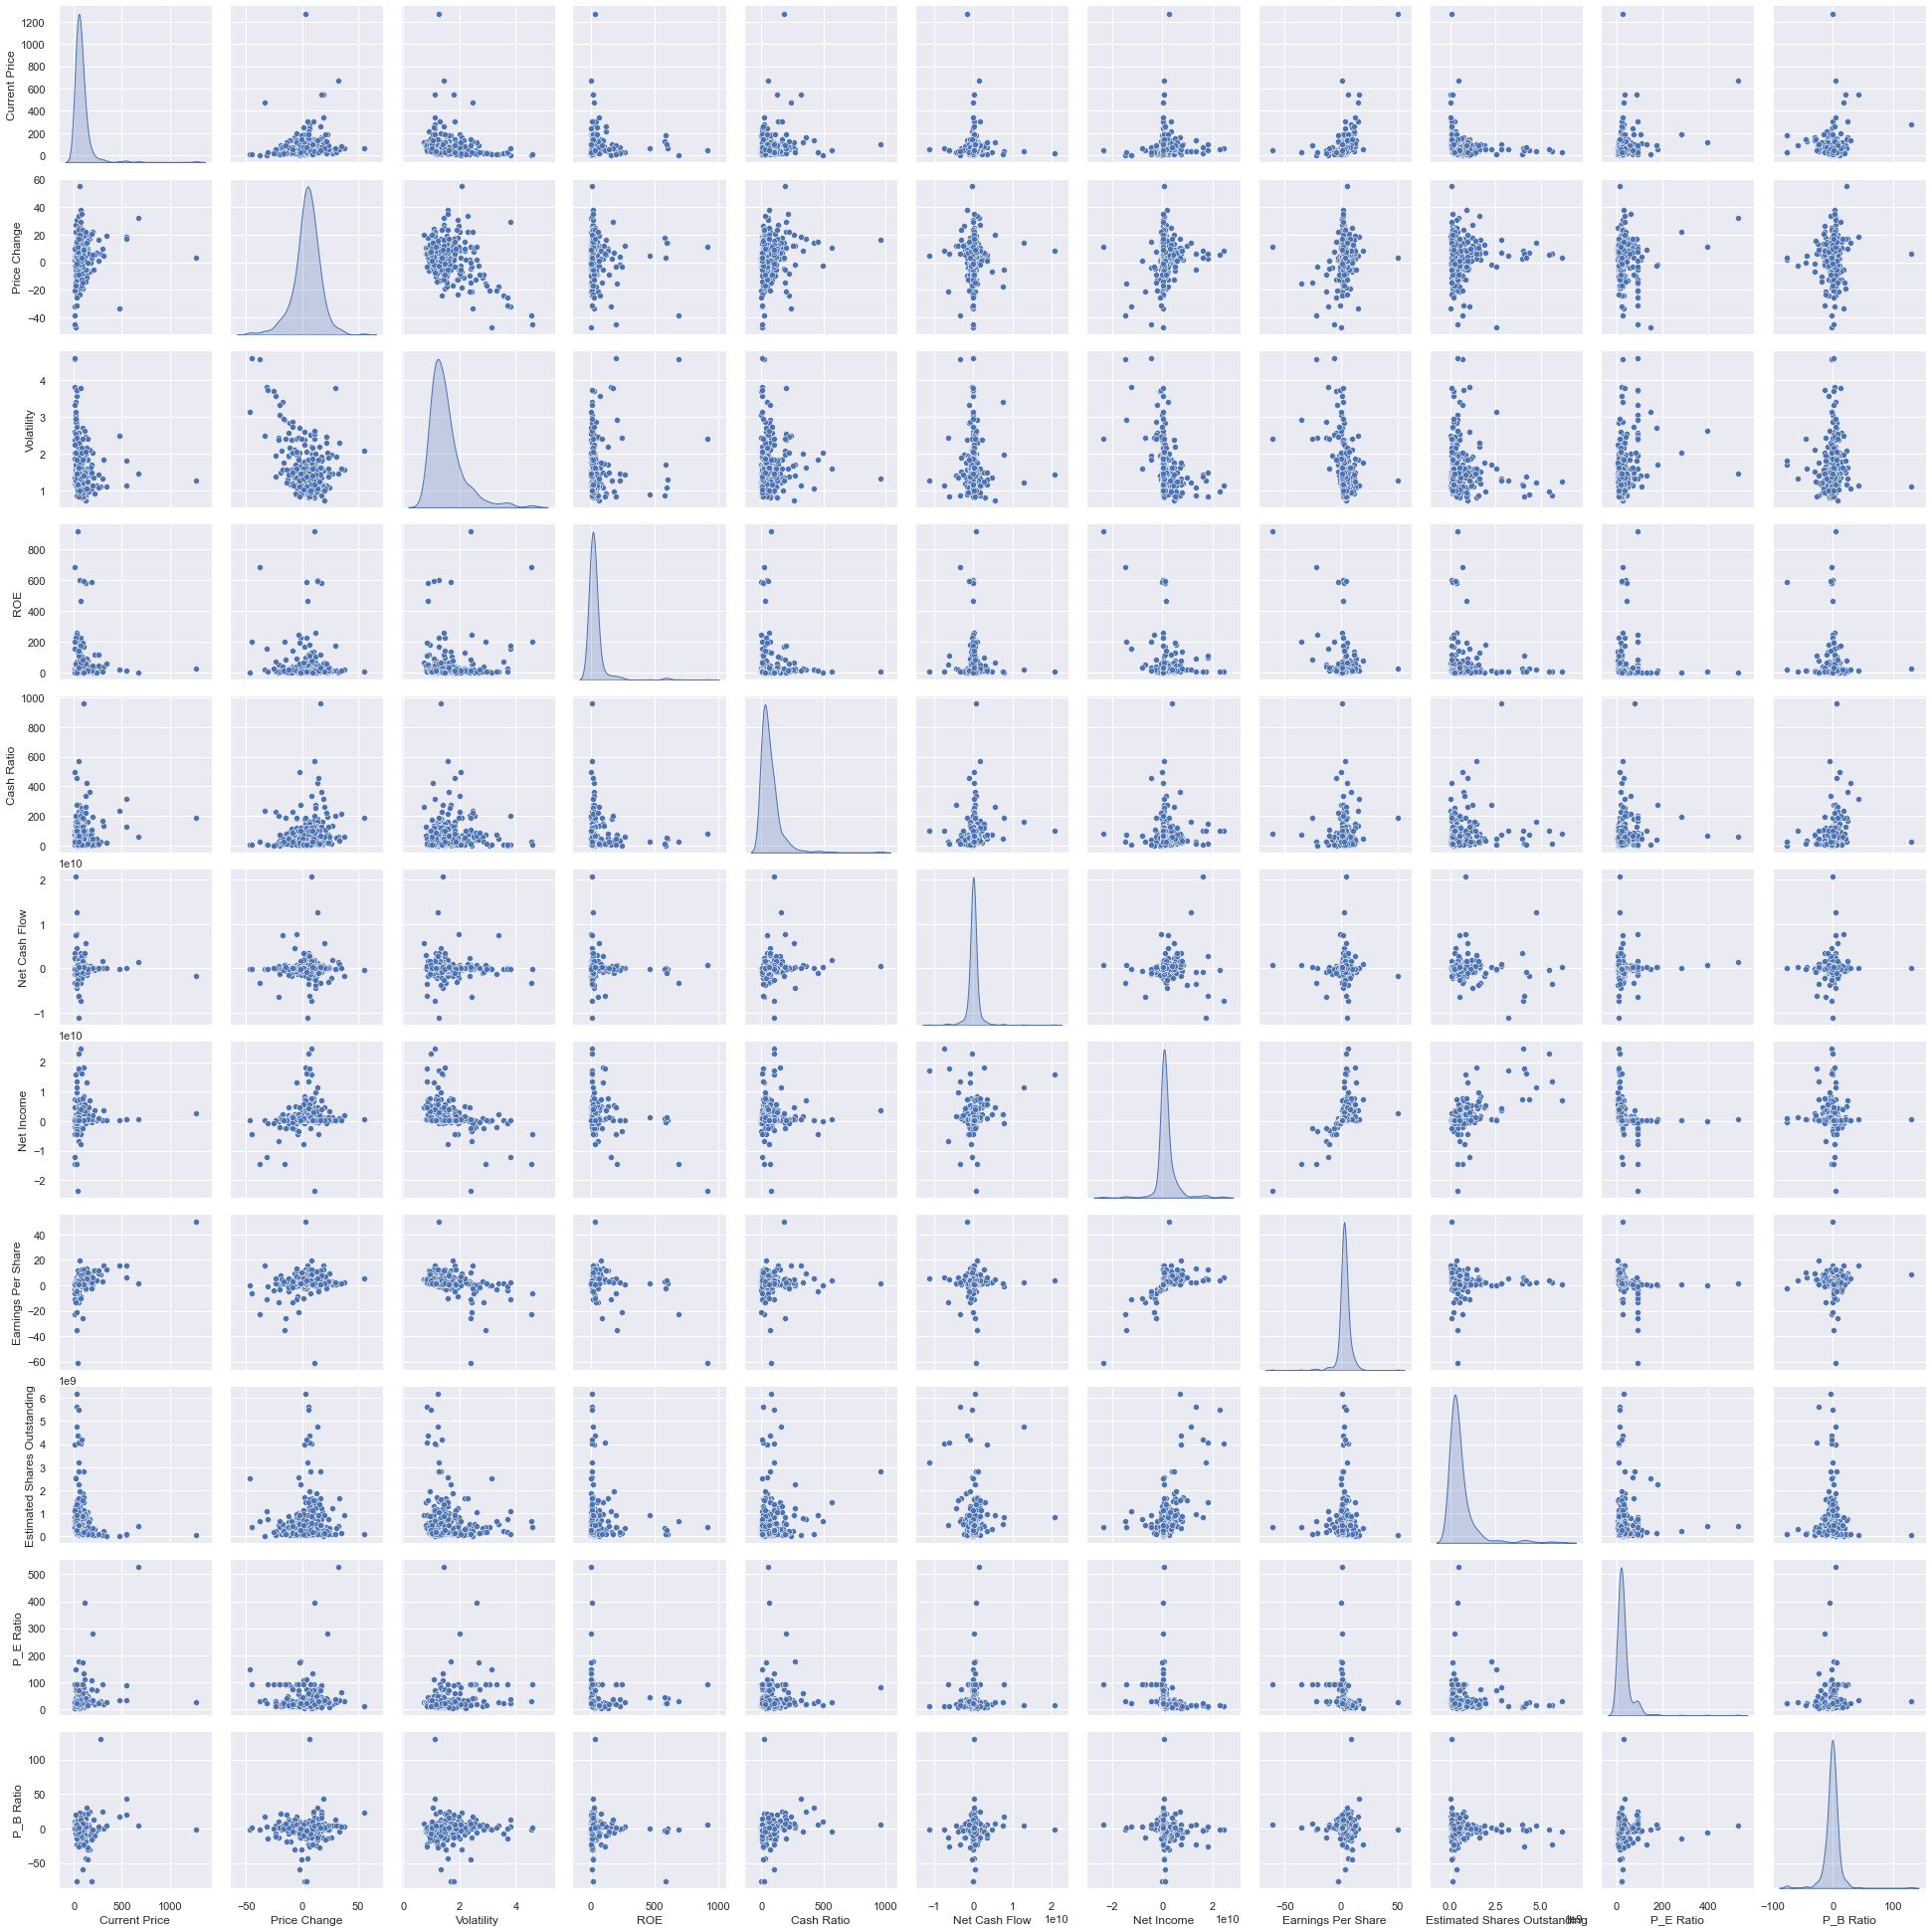

In [142]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

- No specifc pattern of interest is visible.

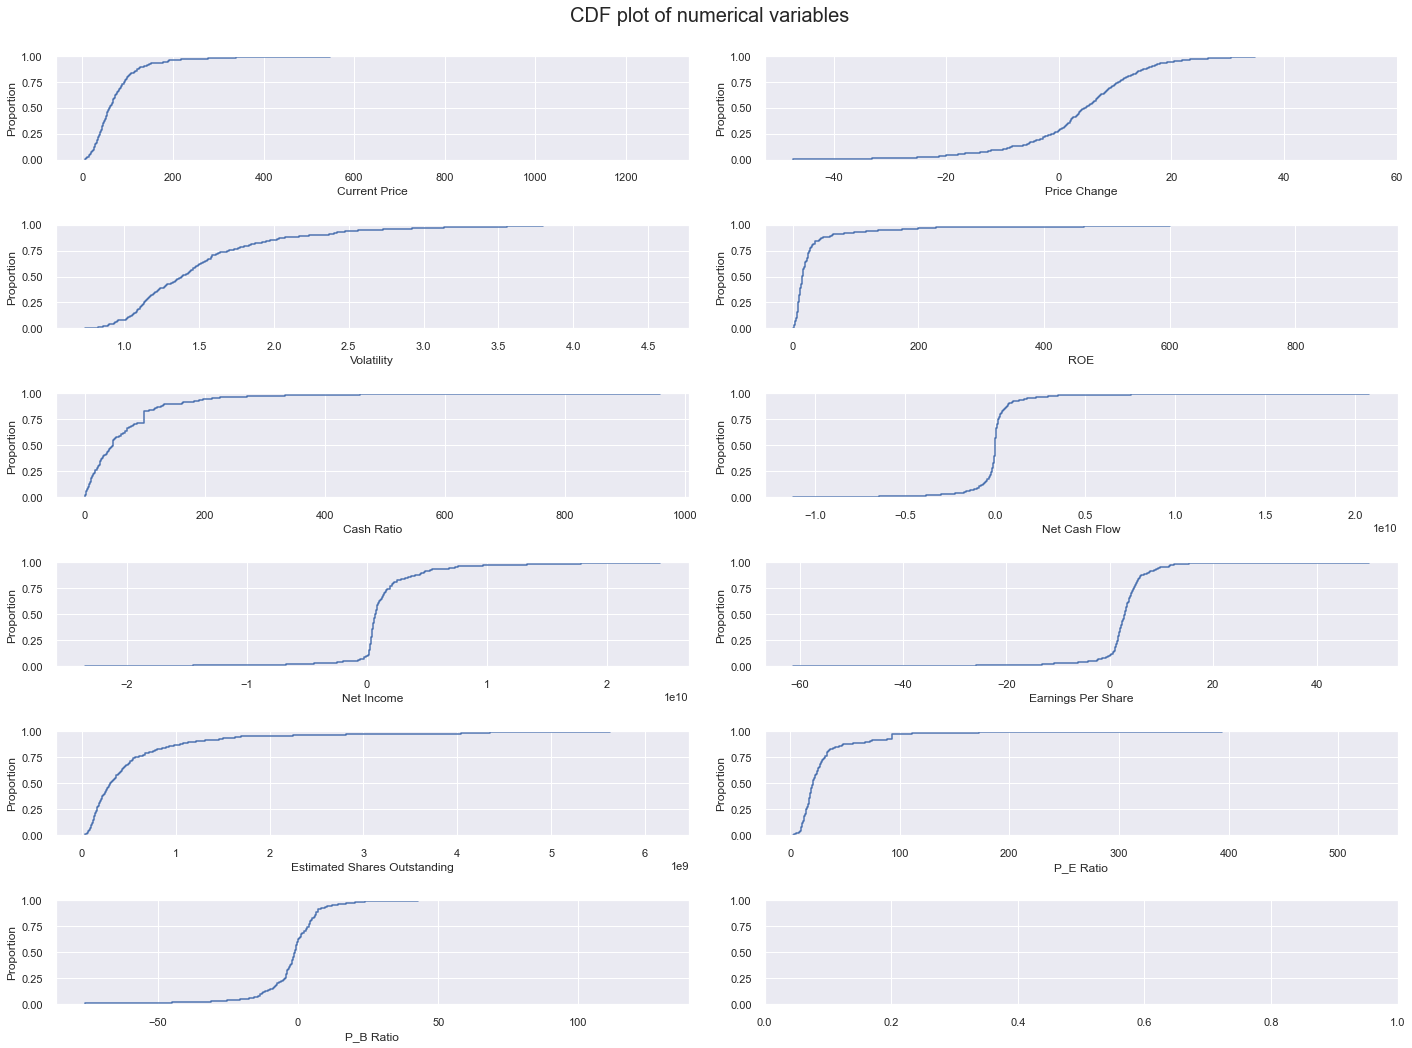

In [143]:
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

1. What does the distribution of stock prices look like?

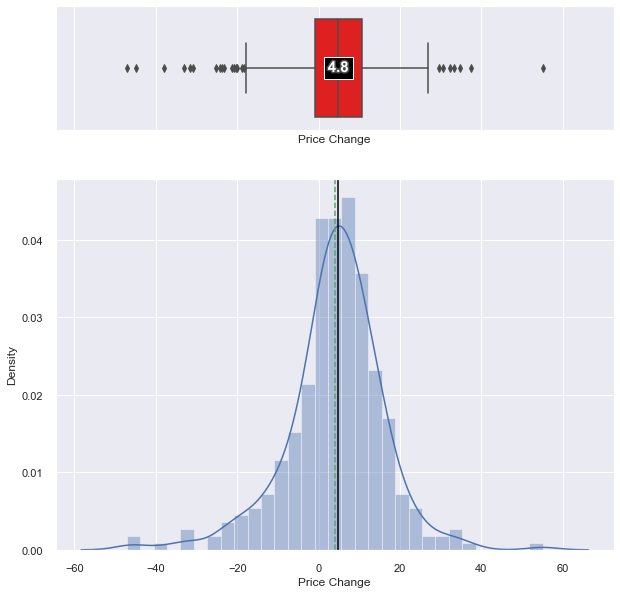

In [144]:
columns =  ['Price Change']
for col in columns:
    box_and_histogram(data[col])

- The distribution of the stock prices almost look like a normal distribution

2. The stocks of which economic sector have seen the maximum price increase on average?

In [145]:
vol_mean = data.groupby('GICS Sector')['Volatility'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
vol_mean

,mean,count
GICS Sector,,
Energy,2.568777,30
Materials,1.816726,20
Information Technology,1.659801,33
Consumer Discretionary,1.595478,40
Health Care,1.541023,40
Industrials,1.416989,53
Telecommunications Services,1.341612,5
Financials,1.267255,49
Real Estate,1.206053,27


In [146]:
vol_results =vol_mean.reset_index()
vol_results

,GICS Sector,mean,count
0,Energy,2.568777,30
1,Materials,1.816726,20
2,Information Technology,1.659801,33
3,Consumer Discretionary,1.595478,40
4,Health Care,1.541023,40
5,Industrials,1.416989,53
6,Telecommunications Services,1.341612,5
7,Financials,1.267255,49
8,Real Estate,1.206053,27
9,Consumer Staples,1.152675,19


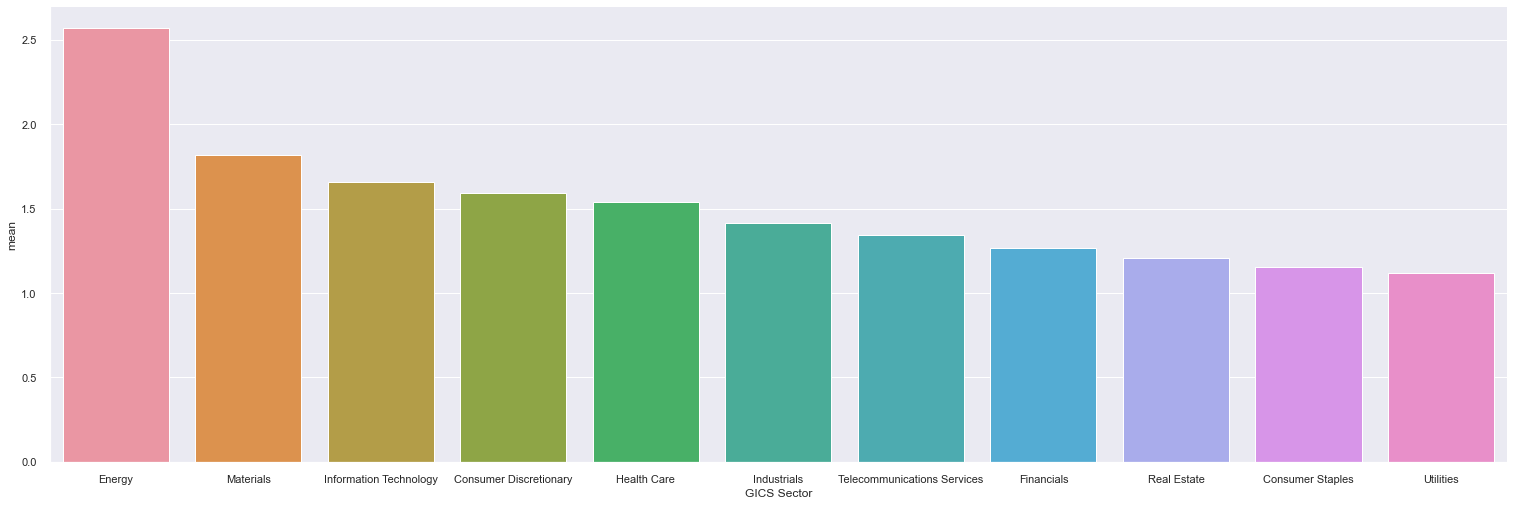

In [147]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="GICS Sector", y="mean", kind="bar", data=vol_results, height=7, aspect=3);

- The stocks of "Energy" economic sector have seen the maximum price increase on average

3. How are the different variables correlated with each other?

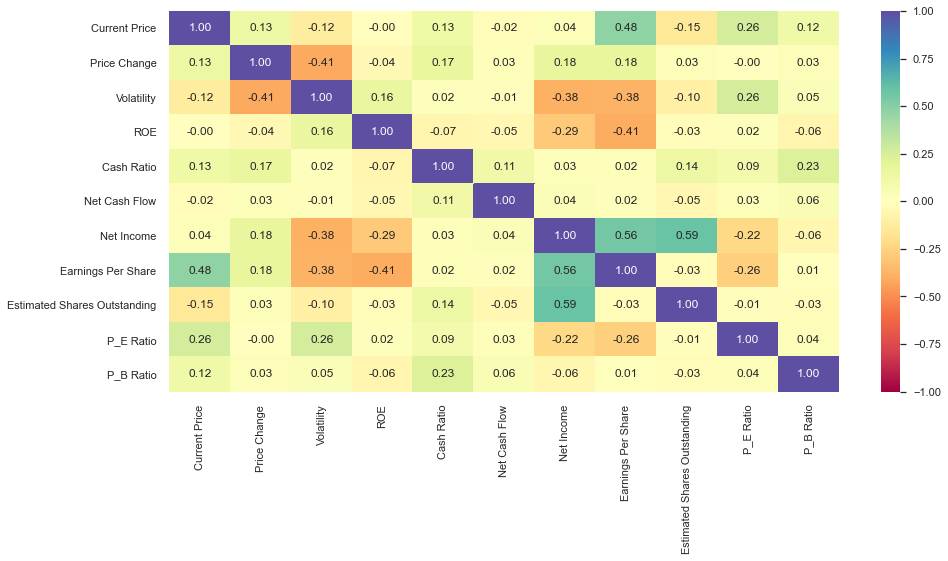

In [148]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Net Income and Estimated Shares Outstanding have good positive correlation, similarly Net Income and Earnings Per Share.
- Current Price and Earnings Per Share have strong positive correlation.
- ROE and Earnings Per Share have strong negative correlation.
- Price Change and Volatility have strong negative correlation, this is as expected.
- Earnings Per Share and Volatility, Net Income and Volatility exhibit negative correlation.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [149]:
cash_ratio_mean = data.groupby('GICS Sector')['Cash Ratio'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
cash_ratio_mean

,mean,count
GICS Sector,,
Information Technology,149.818182,33
Telecommunications Services,117.000000,5
Health Care,103.775000,40
Financials,98.591837,49
Consumer Staples,70.947368,19
Energy,51.133333,30
Real Estate,50.111111,27
Consumer Discretionary,49.575000,40
Materials,41.700000,20


In [150]:
cash_ratio_results = cash_ratio_mean.reset_index()
cash_ratio_results

,GICS Sector,mean,count
0,Information Technology,149.818182,33
1,Telecommunications Services,117.000000,5
2,Health Care,103.775000,40
3,Financials,98.591837,49
4,Consumer Staples,70.947368,19
5,Energy,51.133333,30
6,Real Estate,50.111111,27
7,Consumer Discretionary,49.575000,40
8,Materials,41.700000,20
9,Industrials,36.188679,53


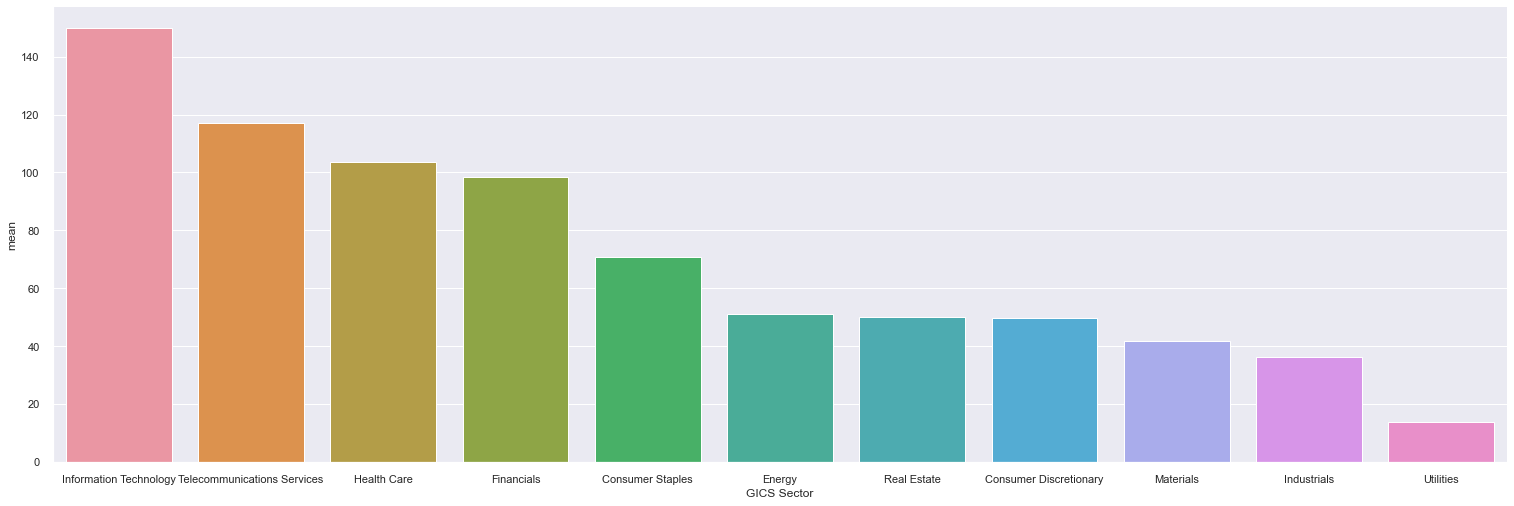

In [151]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="GICS Sector", y="mean", kind="bar", data=cash_ratio_results, height=7, aspect=3);

- Information Technology, Telecommunications Services and Health Care have very good cash ratio.
- Materials, Industrials and Utilities have less cash ratio.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [152]:
P_E_mean = data.groupby('GICS Sector')['P_E Ratio'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
P_E_mean

,mean,count
GICS Sector,,
Energy,72.897709,30
Information Technology,43.782546,33
Real Estate,43.065585,27
Health Care,41.135272,40
Consumer Discretionary,35.211613,40
Consumer Staples,25.521195,19
Materials,24.585352,20
Utilities,18.719412,24
Industrials,18.259380,53


In [153]:
P_E_results = P_E_mean.reset_index()
P_E_results

,GICS Sector,mean,count
0,Energy,72.897709,30
1,Information Technology,43.782546,33
2,Real Estate,43.065585,27
3,Health Care,41.135272,40
4,Consumer Discretionary,35.211613,40
5,Consumer Staples,25.521195,19
6,Materials,24.585352,20
7,Utilities,18.719412,24
8,Industrials,18.259380,53
9,Financials,16.023151,49


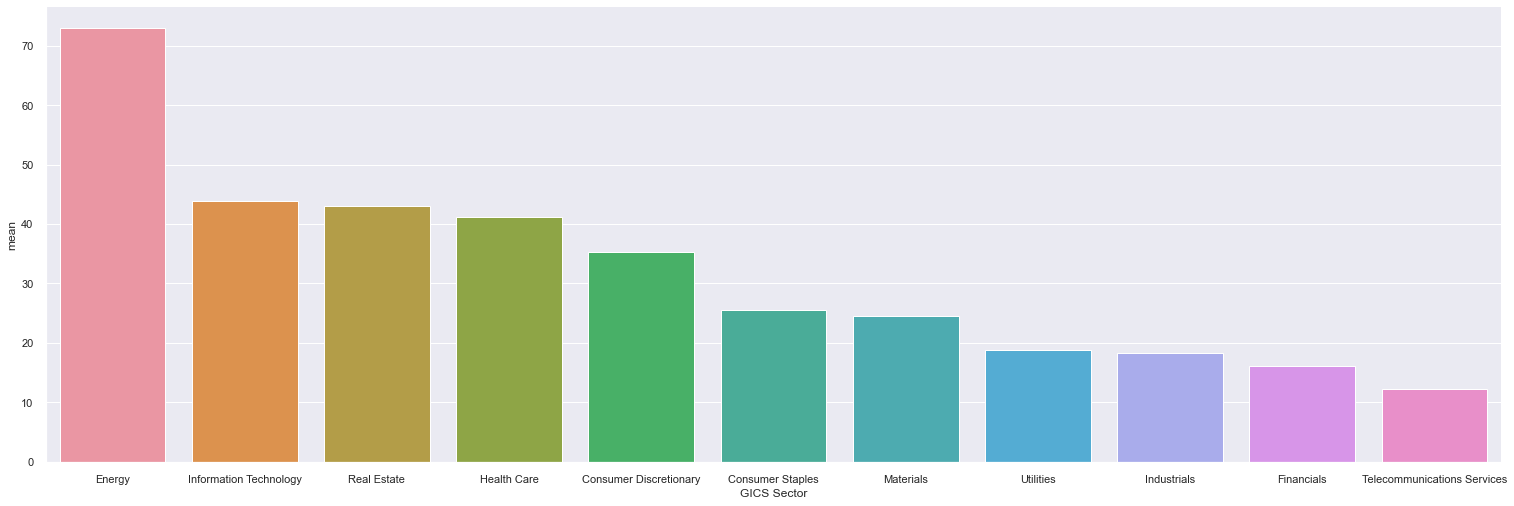

In [154]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="GICS Sector", y="mean", kind="bar", data=P_E_results, height=7, aspect=3);

- Energy sector  has a high P/E ratio
- Information Technology, Real Estate, Health Care all have High P/E ratio, which may not be good for investors.
- Utilities, Industrials, Financials have good P/E ratio for investors.
- Telecommunications Services sector  has a very good P/E ratio.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

- No duplicates in the data set.
- No missing values in the data set.
- As all the numeric data will be scaled, no specific outlier treatmnet needed.

In [155]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [156]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### EDA

- It is a good idea to explore the data once again after manipulating it.

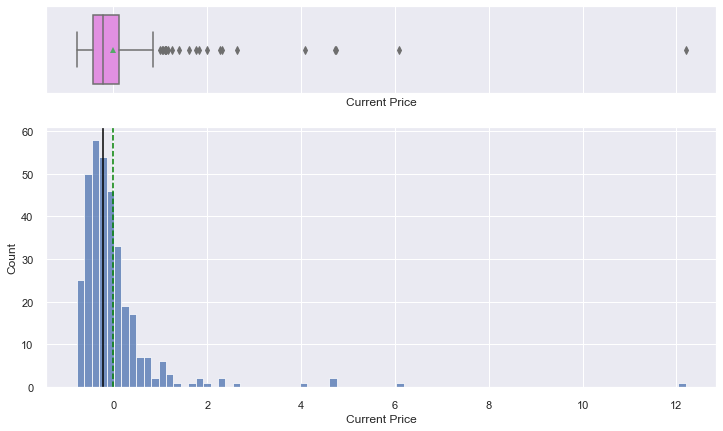

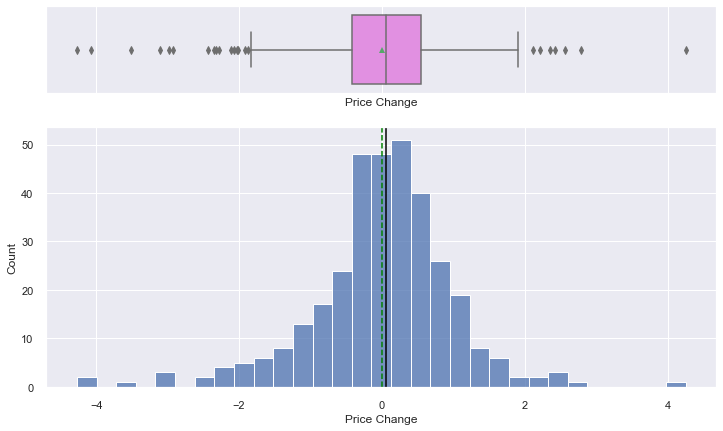

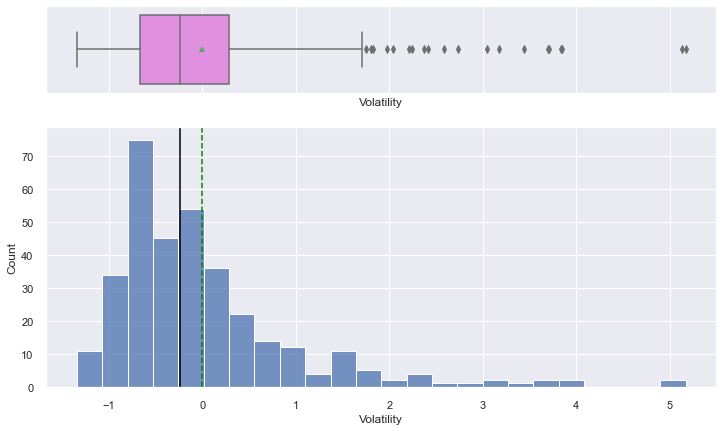

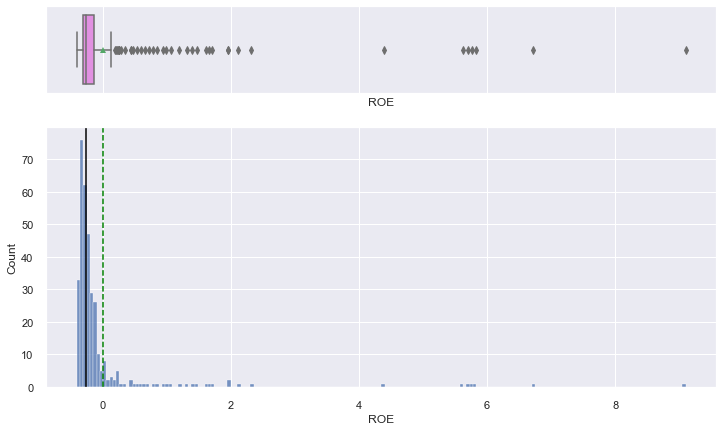

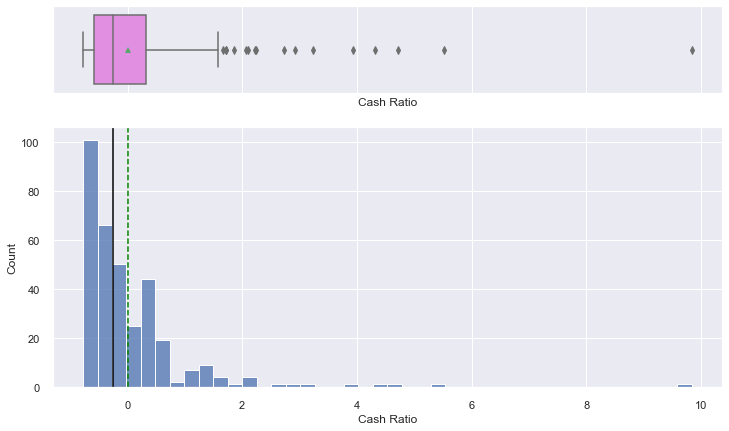

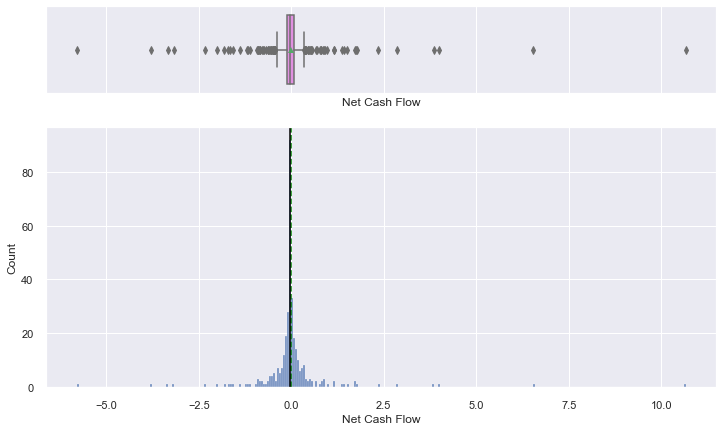

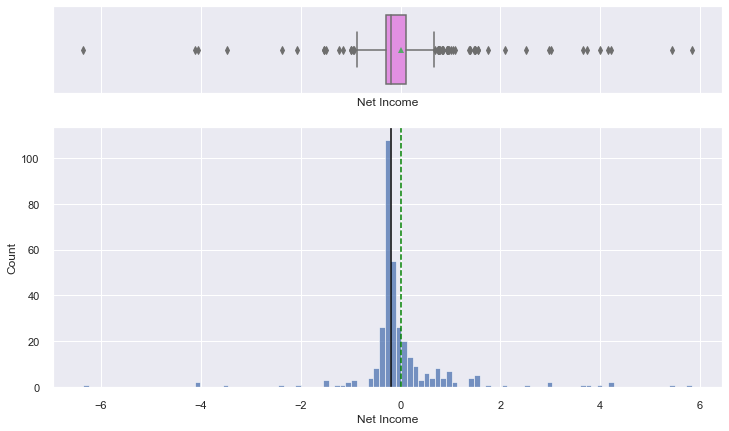

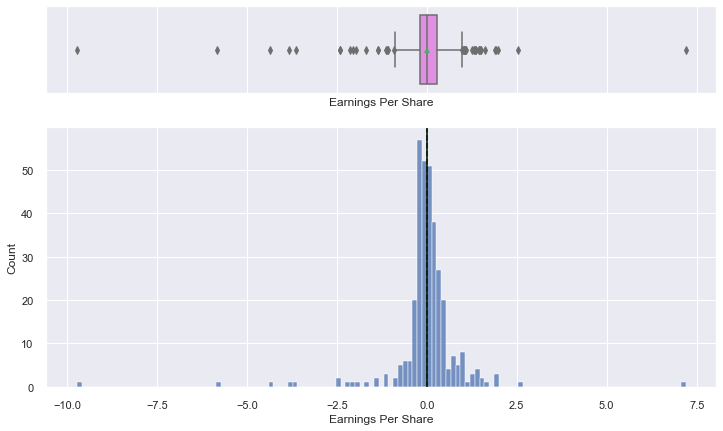

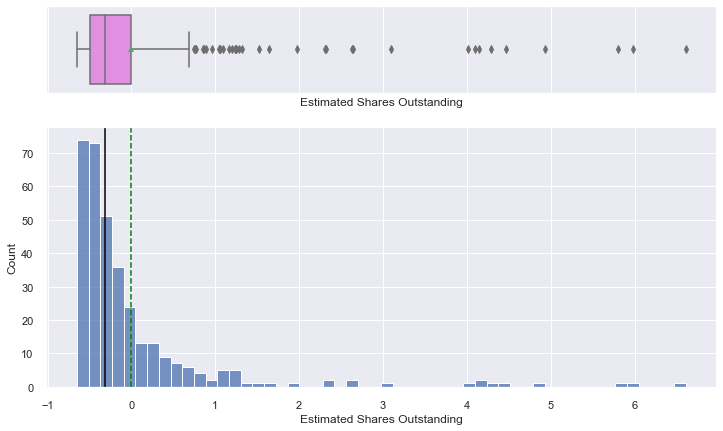

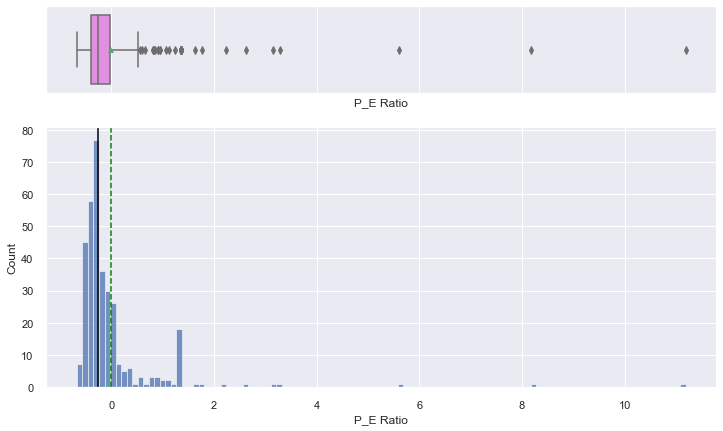

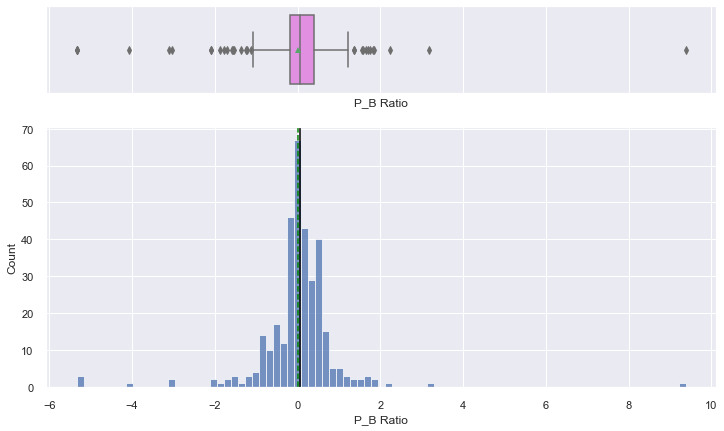

In [157]:
for item in num_col:
    histogram_boxplot(subset_scaled_df, item)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.176396791566185
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.0591416288820374
Number of Clusters: 7 	Average Distortion: 1.9826333396712665
Number of Clusters: 8 	Average Distortion: 1.9753526418461937
Number of Clusters: 9 	Average Distortion: 1.8964970616244075
Number of Clusters: 10 	Average Distortion: 1.8539123989265462
Number of Clusters: 11 	Average Distortion: 1.7997730037404913


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

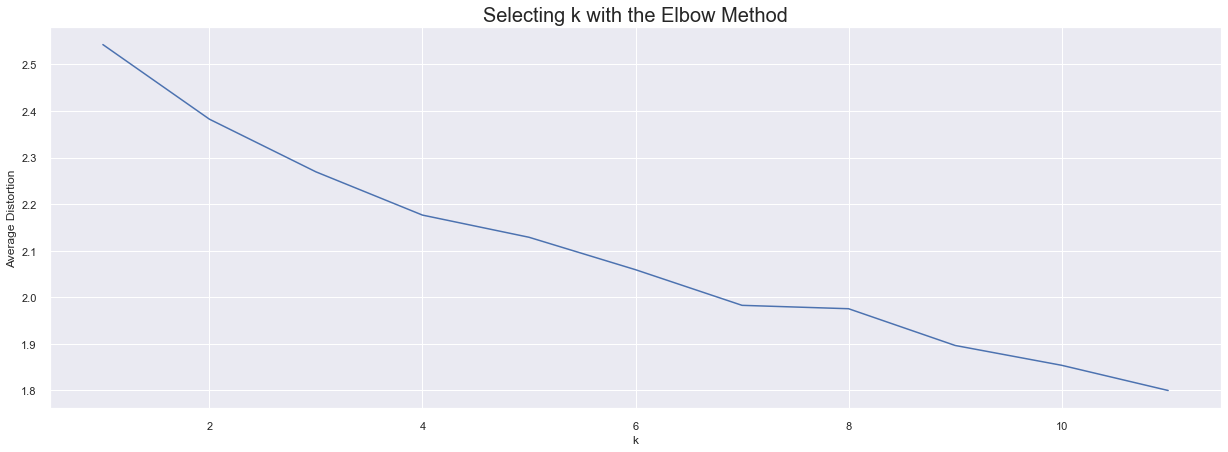

In [158]:
clusters = range(1, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- Appropriate value for k seems to be 8 or 10.

#### Let's check the silhouette scores.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.45797710447228496)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.40759857447931497)
For n_clusters = 6, the silhouette score is 0.4194206033258803)
For n_clusters = 7, the silhouette score is 0.4185436281362793)
For n_clusters = 8, the silhouette score is 0.4146191398667421)
For n_clusters = 9, the silhouette score is 0.38967567488717586)
For n_clusters = 10, the silhouette score is 0.13143171655836627)
For n_clusters = 11, the silhouette score is 0.12272712489085548)
For n_clusters = 12, the silhouette score is 0.15775934538491893)
For n_clusters = 13, the silhouette score is 0.16265801494654208)
For n_clusters = 14, the silhouette score is 0.16545323314088417)


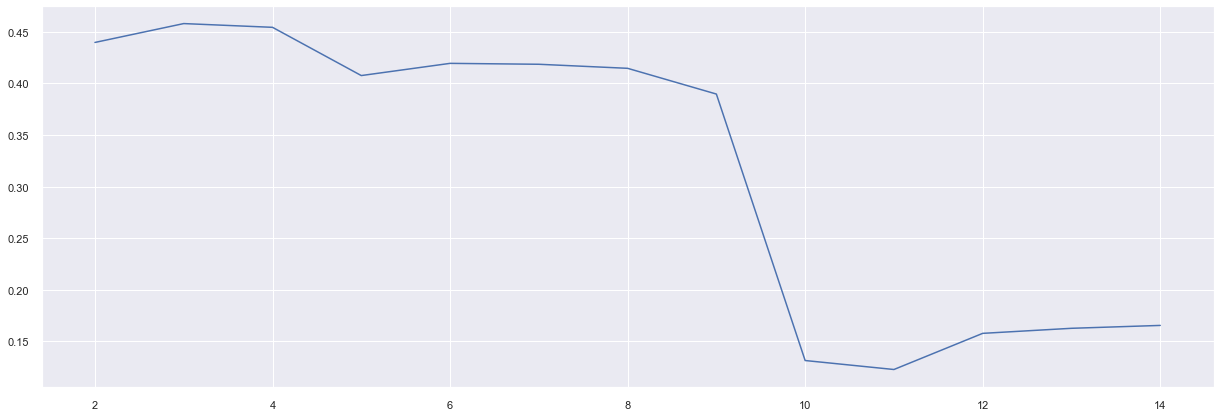

In [159]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- Silhouette score for 6, 7 and  8 clusters is higher. So, let us explore different values of k.

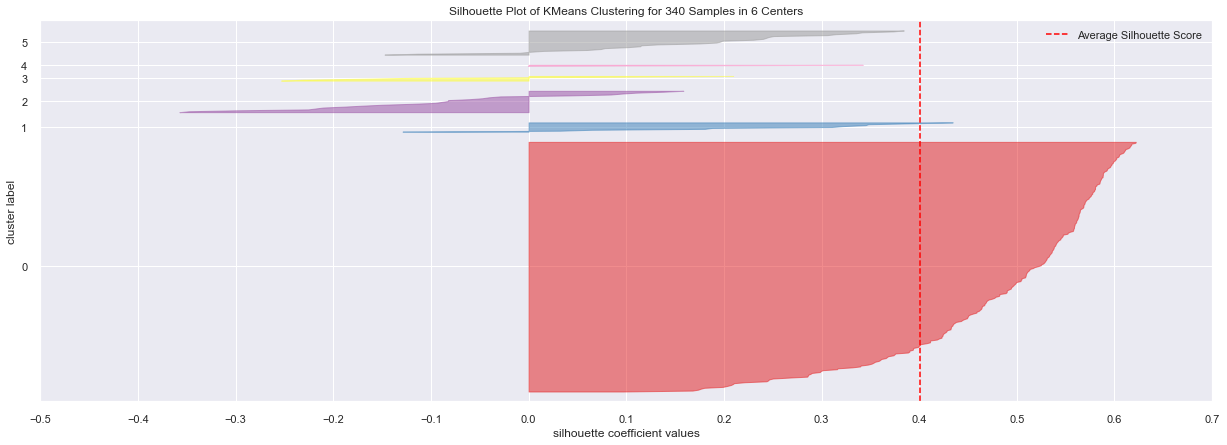

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [160]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

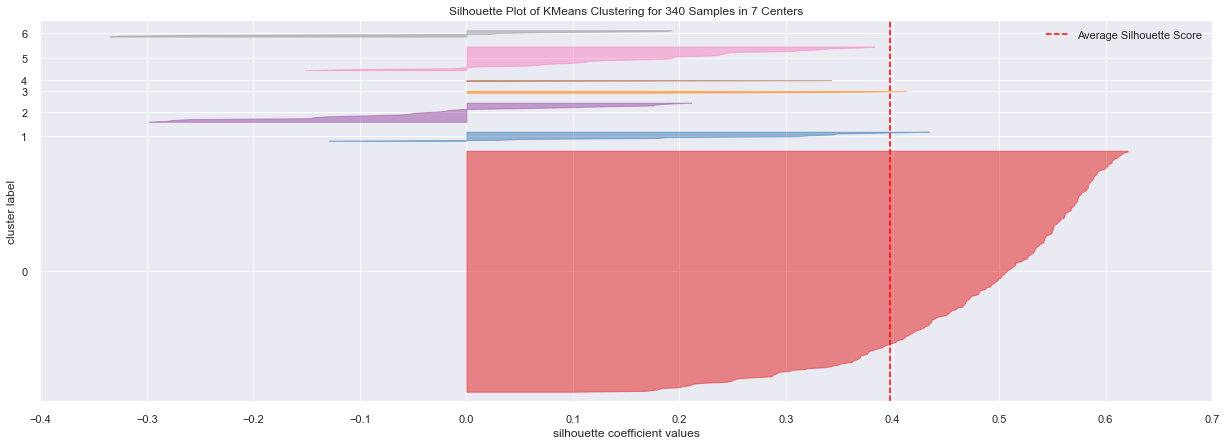

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [161]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

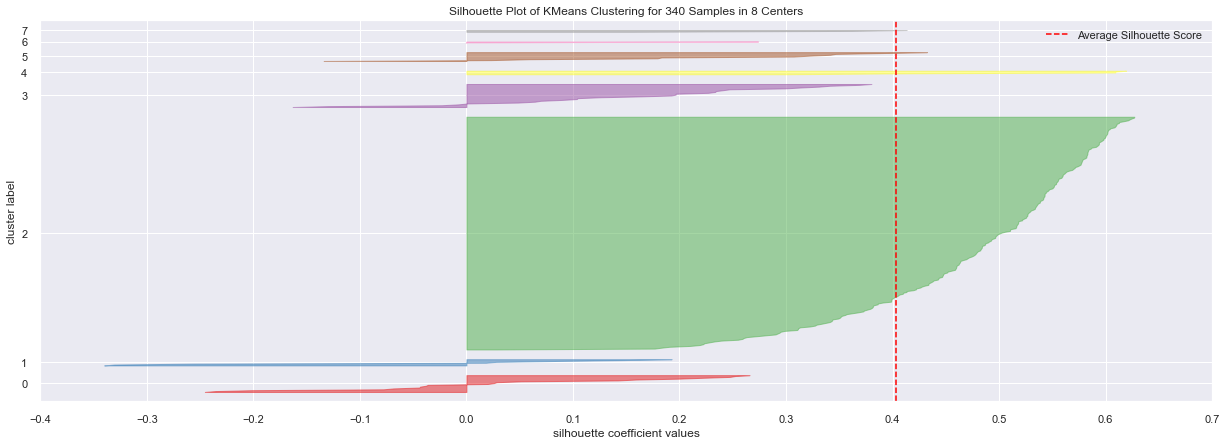

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [162]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

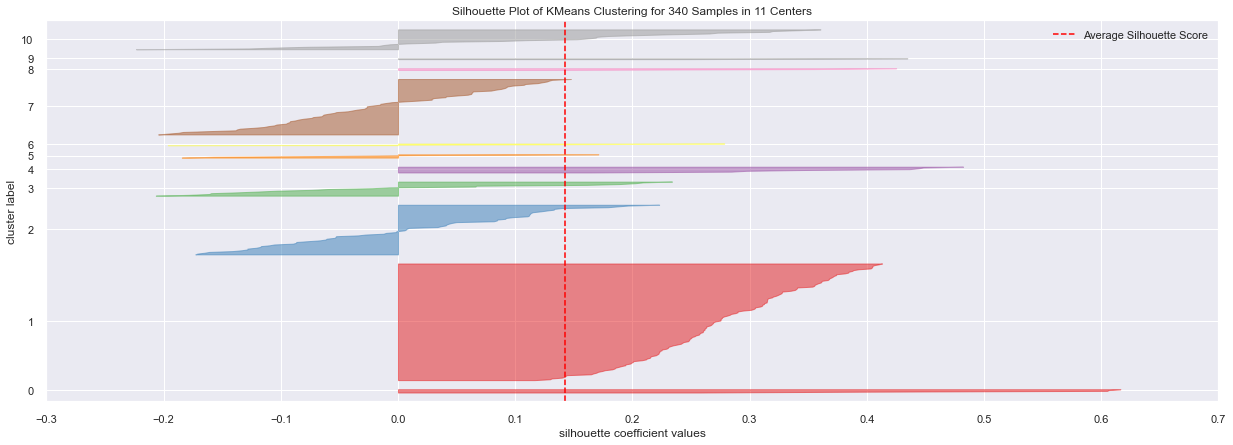

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [163]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

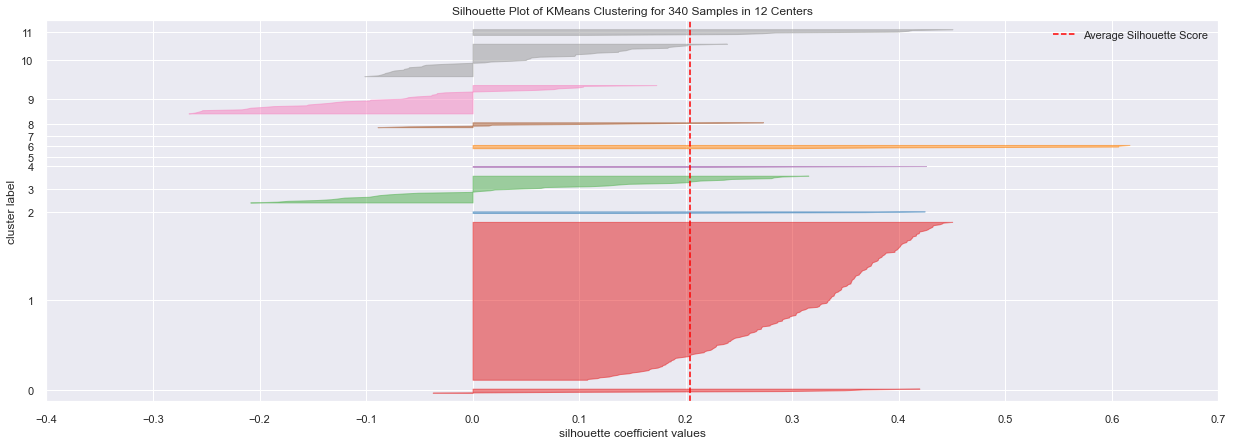

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [164]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(12, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

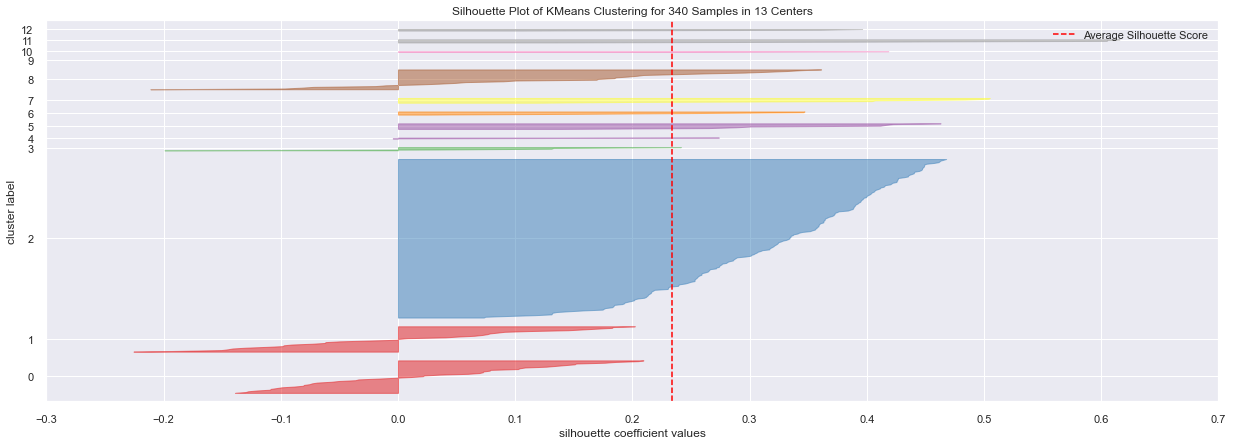

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [165]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(13, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

#### Let's take 8  as the appropriate no. of clusters as the silhouette score is high and visual representation of the clusters at 8 gives an even distribution.

In [166]:
# let's take 8 as number of clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(random_state=0)

In [167]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

###  Cluster Profiling

In [168]:
cluster_profile = data.groupby("K_means_segments").mean()

In [169]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["P_E Ratio"].count().values
)

In [170]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P_E Ratio,P_B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
1,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
2,71.419603,4.948894,1.373081,25.337121,51.272727,19976181.818182,1588185079.545455,3.719489,438021401.544886,23.214179,-3.335092,264
3,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
5,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


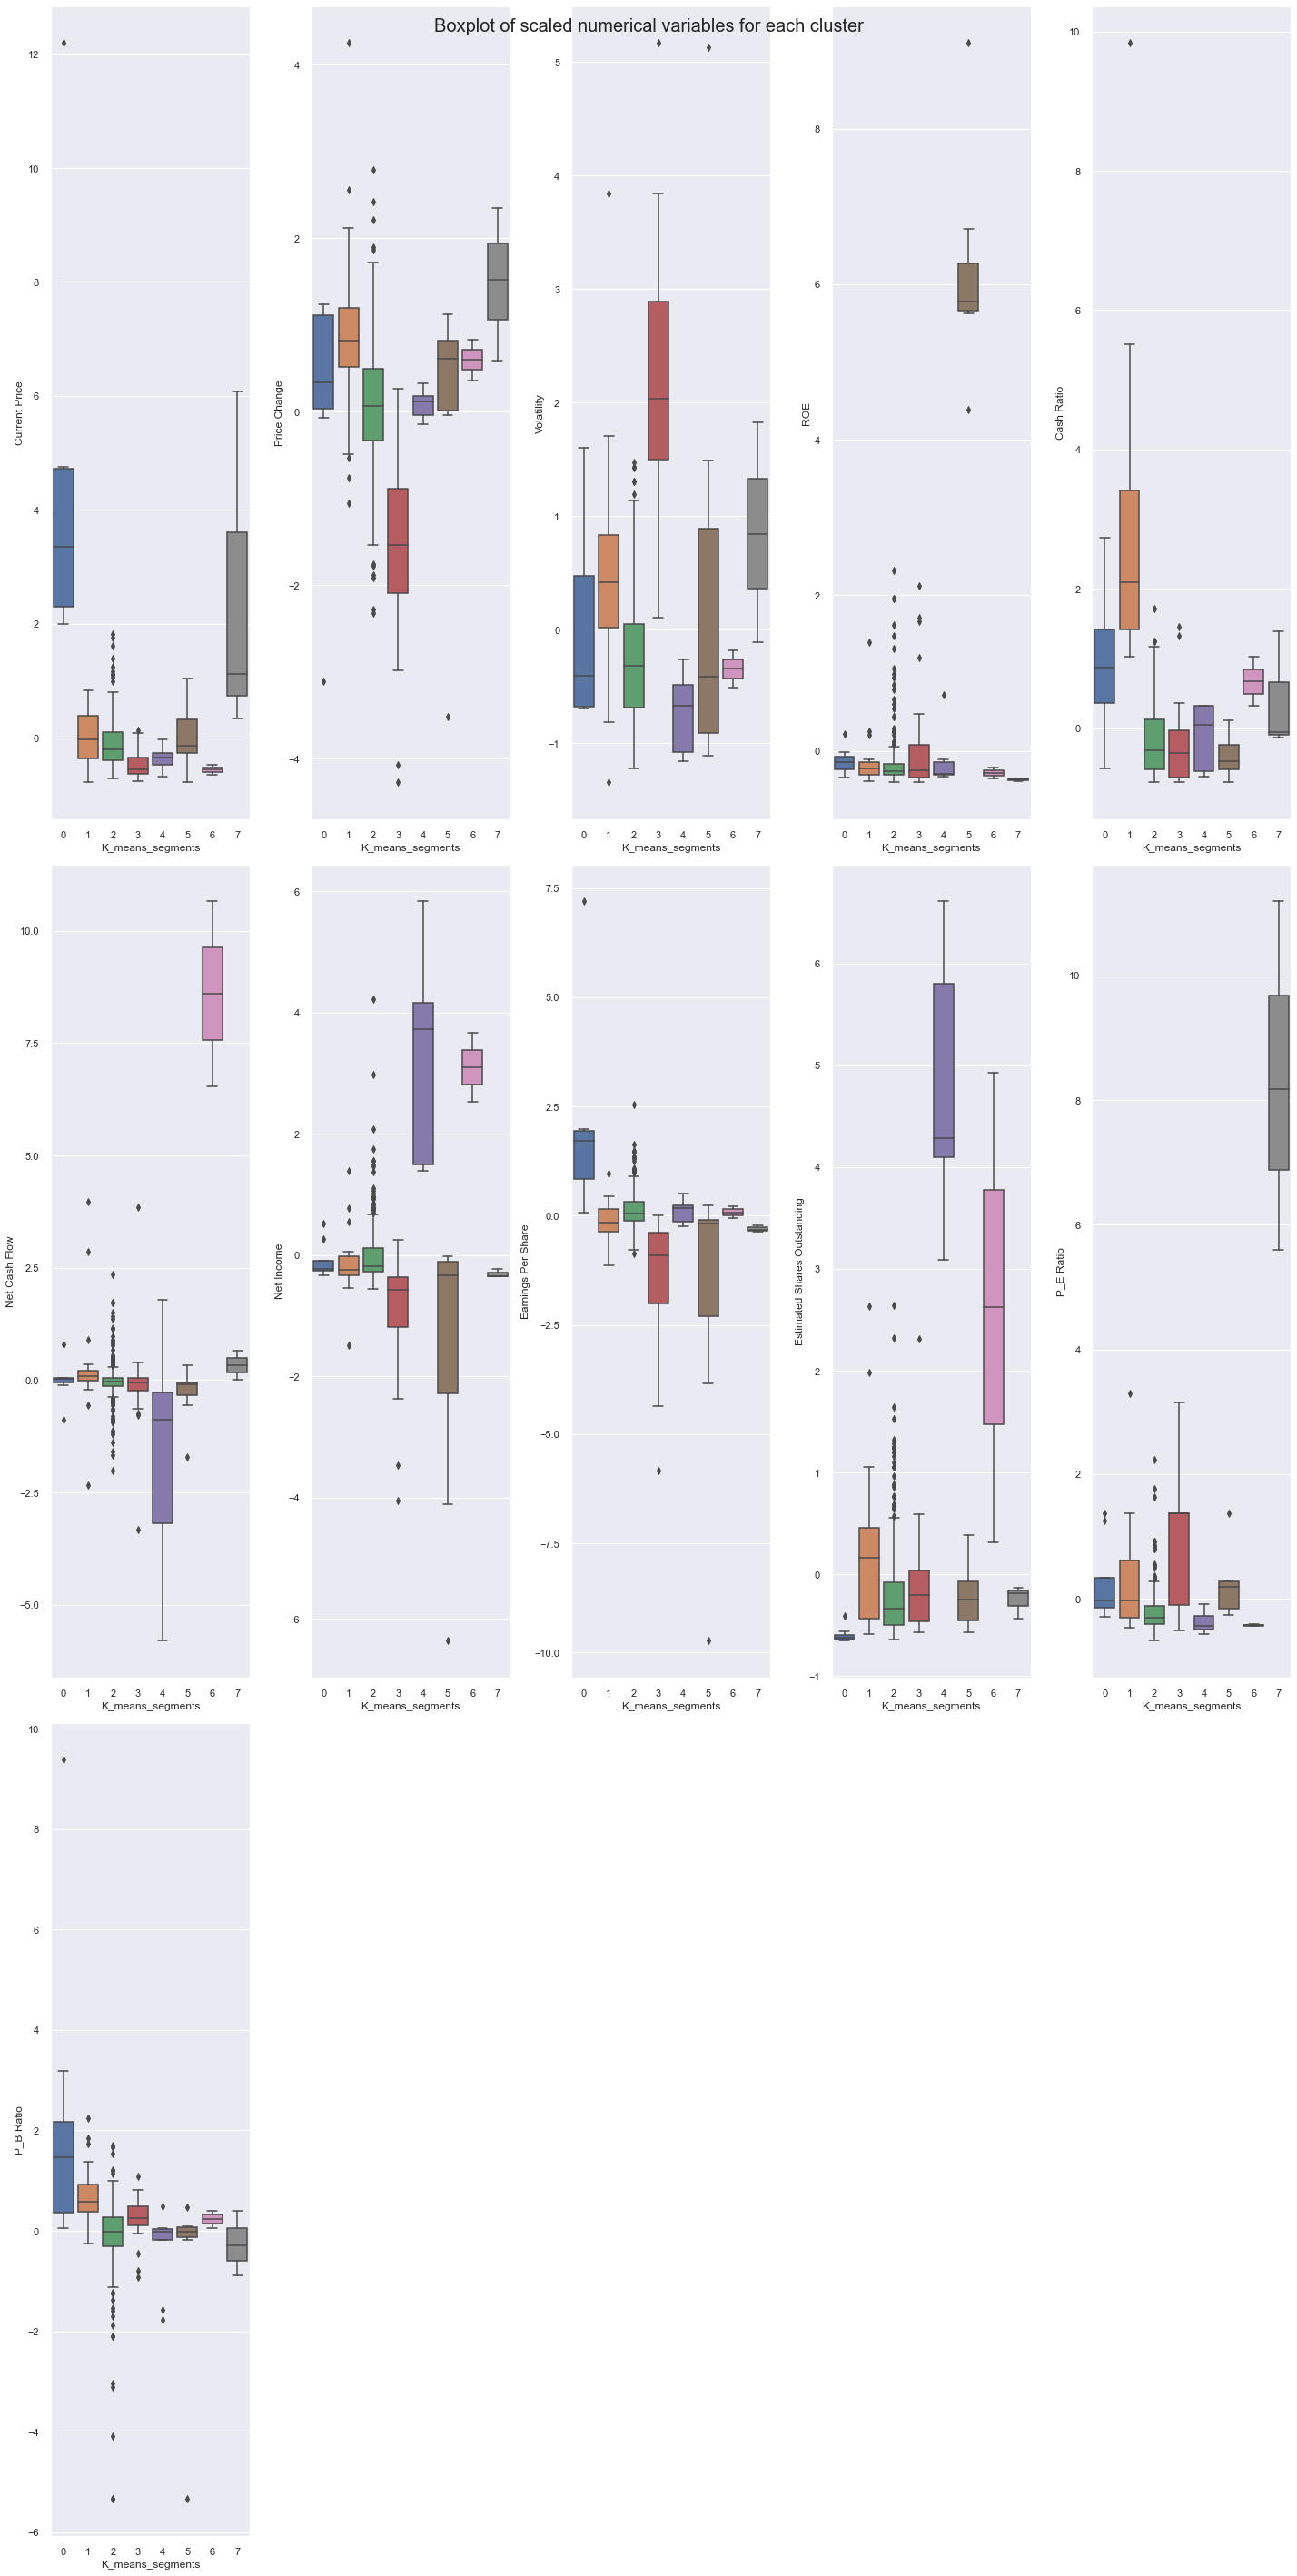

In [171]:

plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for  i, ii in enumerate(range(11)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1
    plt.tight_layout()
    
plt.show()

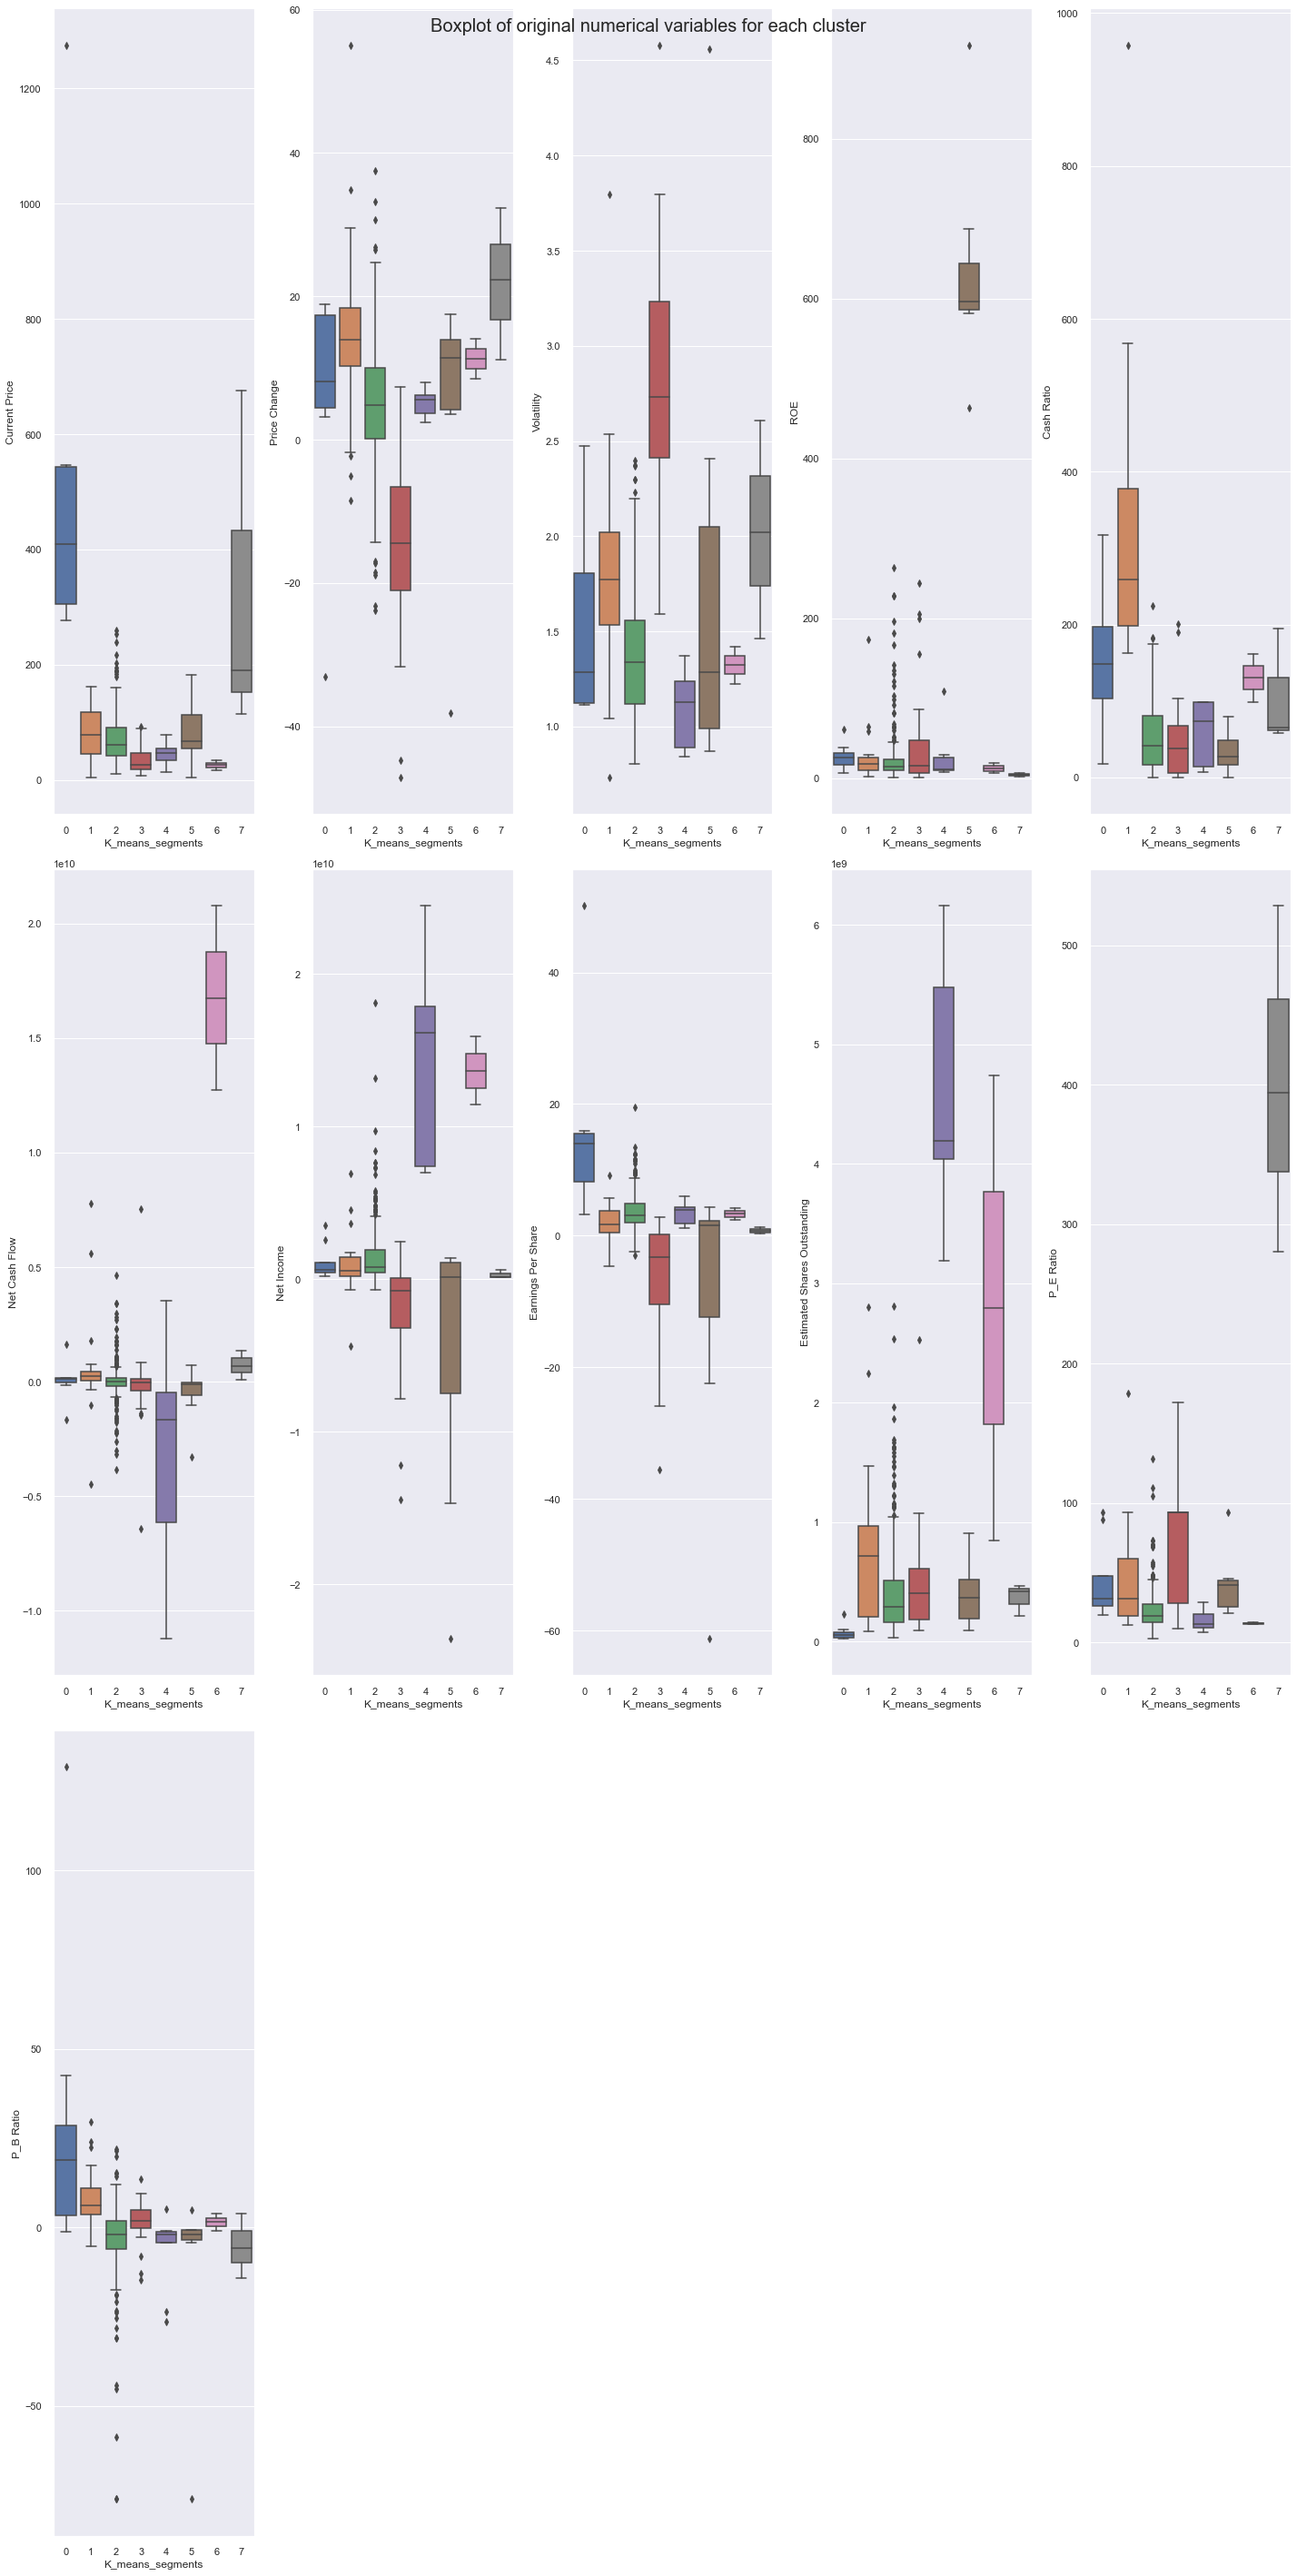

In [172]:
plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for  i, ii in enumerate(range(11)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1
    plt.tight_layout()
    
plt.show()

## Insights

- **Cluster 0**:
 - This cluster contains stocks with a median price of approximately \\$91.
 - Price change of about \\$16 in last 13 weeks and less volatility of about 1.8.
 - The Earning per share is 2.1  and P/E ratio  is 46 , which is high and P/B ration is positive 9 indicating the shares are   
   more or less correctly valued.
 - Has the highest Cash Ratio among all clusters.   
- **Cluster 1**:
 - This cluster contains stocks with a median price of approximately \\$46.
 - Price change of about \\$5 in last 13 weeks and less volatility of about 1.
 - The Earning per share is 3.4 and P/E ratio  is 15 , which is high(indication high growth) and P/B ration is -negative 6
   indicating the shares are undervalued.
 - Has the highest Net Income and Estimated Shares Outstanding among all clusters. 
- **Cluster 2**:
 - This cluster contains stocks with a median price of approximately \\$84.
 - Price change of about \\$3.8 in last 13 weeks and less volatility of about 1.8.
 - The Earning per share is -10.8 and P/E ratio  is 42.2 , which is high(indication high growth) and P/B ration is  -negative 11 
   indicating the shares are undervalued.
 - Has the ROE among all clusters.
- **Cluster 3**:
 - This cluster contains stocks with a median price of approximately \\$73.
 - Price change of about \\$5 in last 13 weeks and less volatility of about 1.3.
 - The Earning per share is 3.7 and P/E ratio  is 23.3 , which is high(indication high growth) and P/B ration is -negative 3 
   indicating the shares are undervalued.
 - Has the highest number of stocks among all clusters.
- **Cluster 4**:
 - This cluster contains stocks with a median price of approximately \\$624 which is the highest average.
 - Price change of about \\$2.3 in last 13 weeks and less volatility of about 1.5.
 - The Earning per share is 19.26 and P/E ratio  is 42.05 , which is high(indication high growth) and P/B ration is positive 41 
   indicating the shares are over valued.The hignest P/B ratio among all the clusters.
 - Has the highest Earnings per share.   
- **Cluster 5**:
 - This cluster contains stocks with a median price of approximately \\$34.
 - Price change of about -\\$15 in last 13 weeks and volatility of about 2.8, the highest among all the clusters.
 - The Earning per share is -6 and P/E ratio  is 76.25 , which is high(indication high growth) and P/B ration  is positive 2 
   indicating the shares are almost correctly valued.
 - Has the second highest number of stocks, highest volatility among all clusters.
- **Cluster 6**:
 - This cluster contains stocks with a median price of approximately \\$25.
 - Price change of about \\$11 in last 13 weeks and less volatility of about 1.3, the lowest among all clusters.
 - The Earning per share is 3.29 and P/E ratio  is 13.64 , which is good and P/B ration is -negative 1.5 indicating the shares are   
  undervalued.
 - Has the highest Net Income among all clusters. 
- **Cluster 7**:
 - This cluster contains stocks with a median price of approximately \\$327.
 - Price change of about \\$21.9 in last 13 weeks and volatility of about 2.02.
 - The Earning per share is .75  and P/E ratio  is 400.89 , which is too high and P/B ration is -negative 5 indicating the shares 
   are undervalued.
 - Has the P/E ratio and price change among all clusters. 

## Hierarchical Clustering

In [173]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9345526329379537.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8452929808109975.
Cophenetic correlation for Euclidean distance and average linkage is 0.9495821453768725.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9156327901892896.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9177074000650272.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8031917698414331.
Cophenetic correlation for Chebyshev distance and average linkage is 0.93724310450871.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8906157116060892.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9306417886860311.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7932196483047811.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9371656111212013.
Cophenetic corr

In [174]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495821453768725, which is obtained with Euclidean distance and average linkage.


### Let's explore different linkage methods with Euclidean distance only.

In [175]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9345526329379537.
Cophenetic correlation for complete linkage is 0.8452929808109975.
Cophenetic correlation for average linkage is 0.9495821453768725.
Cophenetic correlation for centroid linkage is 0.9471718133891771.
Cophenetic correlation for ward linkage is 0.7095968268387225.
Cophenetic correlation for weighted linkage is 0.9156327901892896.


In [176]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495821453768725, which is obtained with average linkage.


- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

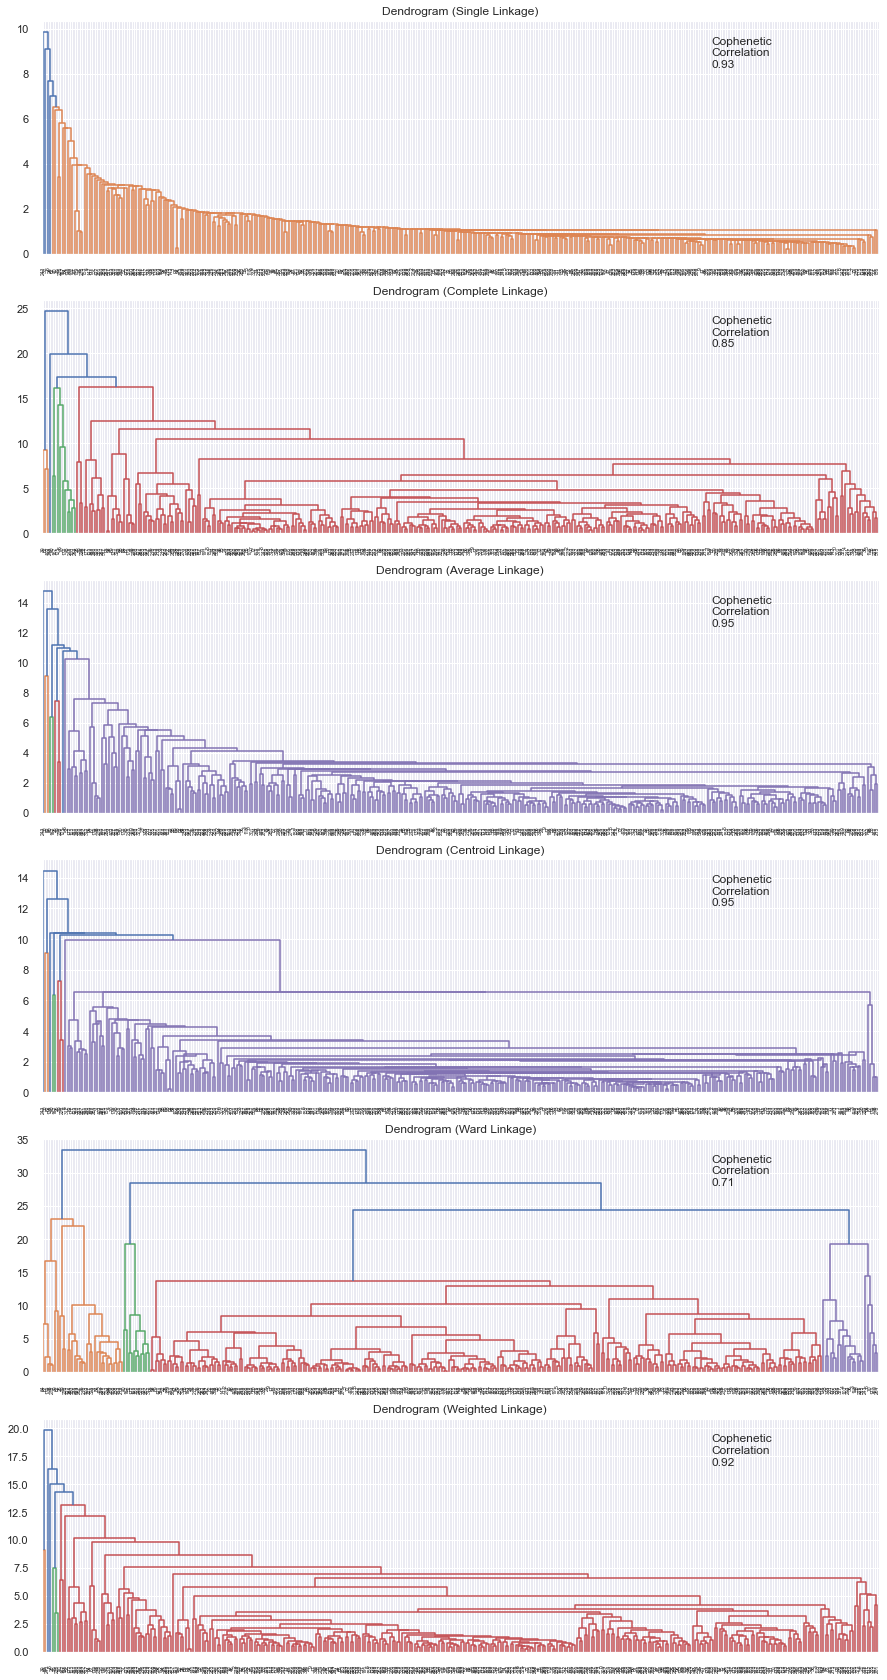

In [177]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

- Dendrogram for Ward linkage shows distinct and separate clusters.

In [178]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.934553
1,complete,0.845293
2,average,0.949582
3,centroid,0.947172
4,ward,0.709597
5,weighted,0.915633


### Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).

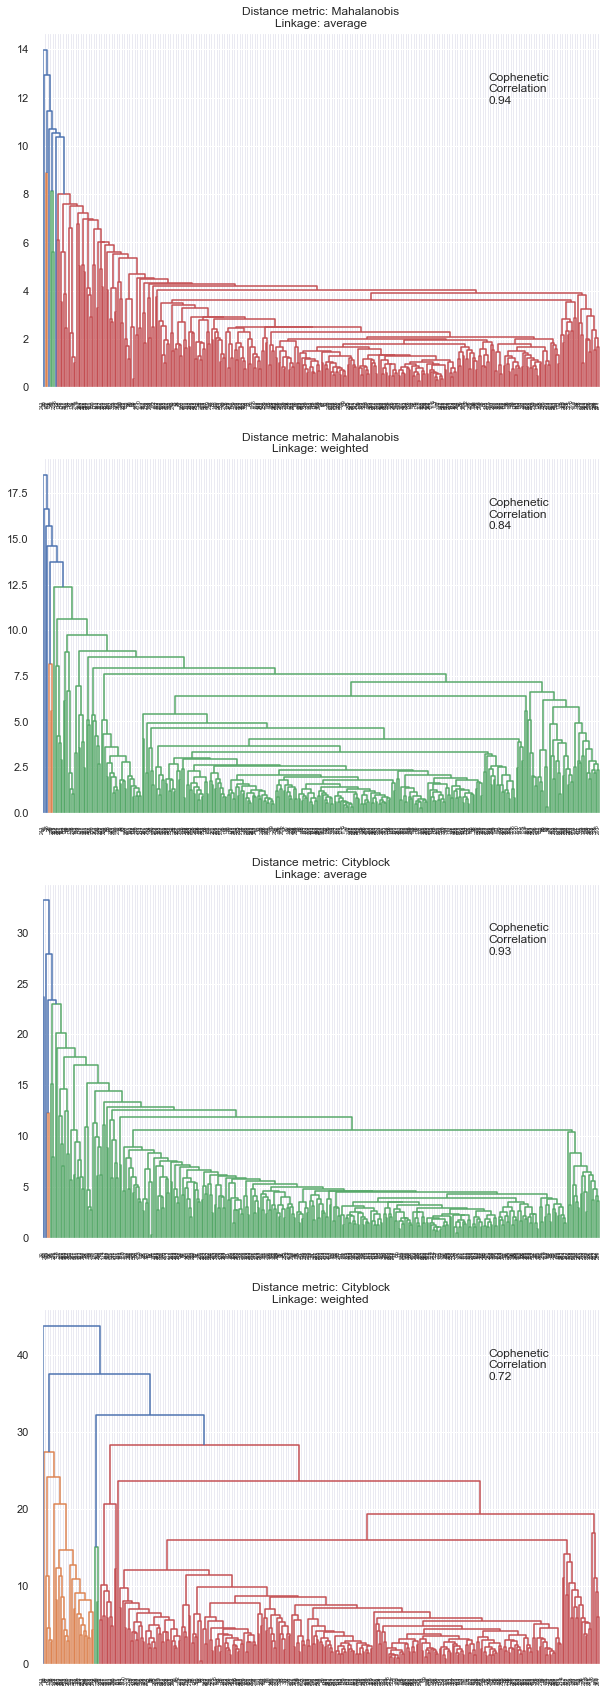

In [179]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average","weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- We will explore on the number of clusters.

## Cluster Profiling

#### Let's create 10 clusters.

In [180]:
HCmodel = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=10)

In [181]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [182]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [183]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["P_E Ratio"].count().values
)

In [184]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P_E Ratio,P_B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,72.526388,4.734948,1.399007,25.315018,53.172161,93306197.802198,1579848003.663004,3.751593,439517549.217985,23.360921,-3.030339,1.989011,273
1,80.825491,16.770902,1.875115,27.588235,339.000000,-65459941.176471,834377058.823529,1.880588,813555933.382353,45.029416,7.898655,1.000000,17
2,37.122609,-16.298641,2.812537,55.086957,49.304348,-429502043.478261,-3019905391.304348,-7.632609,498616643.819130,85.883230,1.216453,3.000000,23
3,429.569995,3.761200,1.565483,18.000000,174.400000,362405800.000000,496954600.000000,9.900000,59200701.450000,55.569866,46.627828,0.000000,5
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,4.000000,9
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,7.000000,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,6.000000,2
7,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,5.000000,2
8,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5.000000,5


- Few cluster have only 1 or 2 data points

#### Let's create 8 clusters.

In [185]:
HCmodel = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=8)

In [186]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [187]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [188]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["P_E Ratio"].count().values
)

In [189]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P_E Ratio,P_B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,5.000000,7
1,160.085605,13.814152,1.804744,25.409091,301.590909,31782272.727273,757690136.363636,3.703182,642111562.488636,47.424973,16.700740,0.772727,22
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,4.000000,9
3,37.122609,-16.298641,2.812537,55.086957,49.304348,-429502043.478261,-3019905391.304348,-7.632609,498616643.819130,85.883230,1.216453,3.000000,23
4,72.526388,4.734948,1.399007,25.315018,53.172161,93306197.802198,1579848003.663004,3.751593,439517549.217985,23.360921,-3.030339,1.989011,273
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,7.000000,3
6,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,0.000000,1
7,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,6.000000,2


- Few cluster have only 2 or 3 data points 

####  Let's create 7 clusters.

In [190]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=7)

In [191]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [192]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [193]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["P_E Ratio"].count().values
)

In [194]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P_E Ratio,P_B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,208.557968,13.352255,1.781422,25.565217,296.478261,-42268521.739130,835675782.608696,5.720000,616408256.122609,46.469678,15.928863,0.739130,23
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,5.000000,7
2,37.122609,-16.298641,2.812537,55.086957,49.304348,-429502043.478261,-3019905391.304348,-7.632609,498616643.819130,85.883230,1.216453,3.000000,23
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,4.000000,9
4,72.526388,4.734948,1.399007,25.315018,53.172161,93306197.802198,1579848003.663004,3.751593,439517549.217985,23.360921,-3.030339,1.989011,273
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,7.000000,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,6.000000,2


- Now the clusters seem to have more variability.

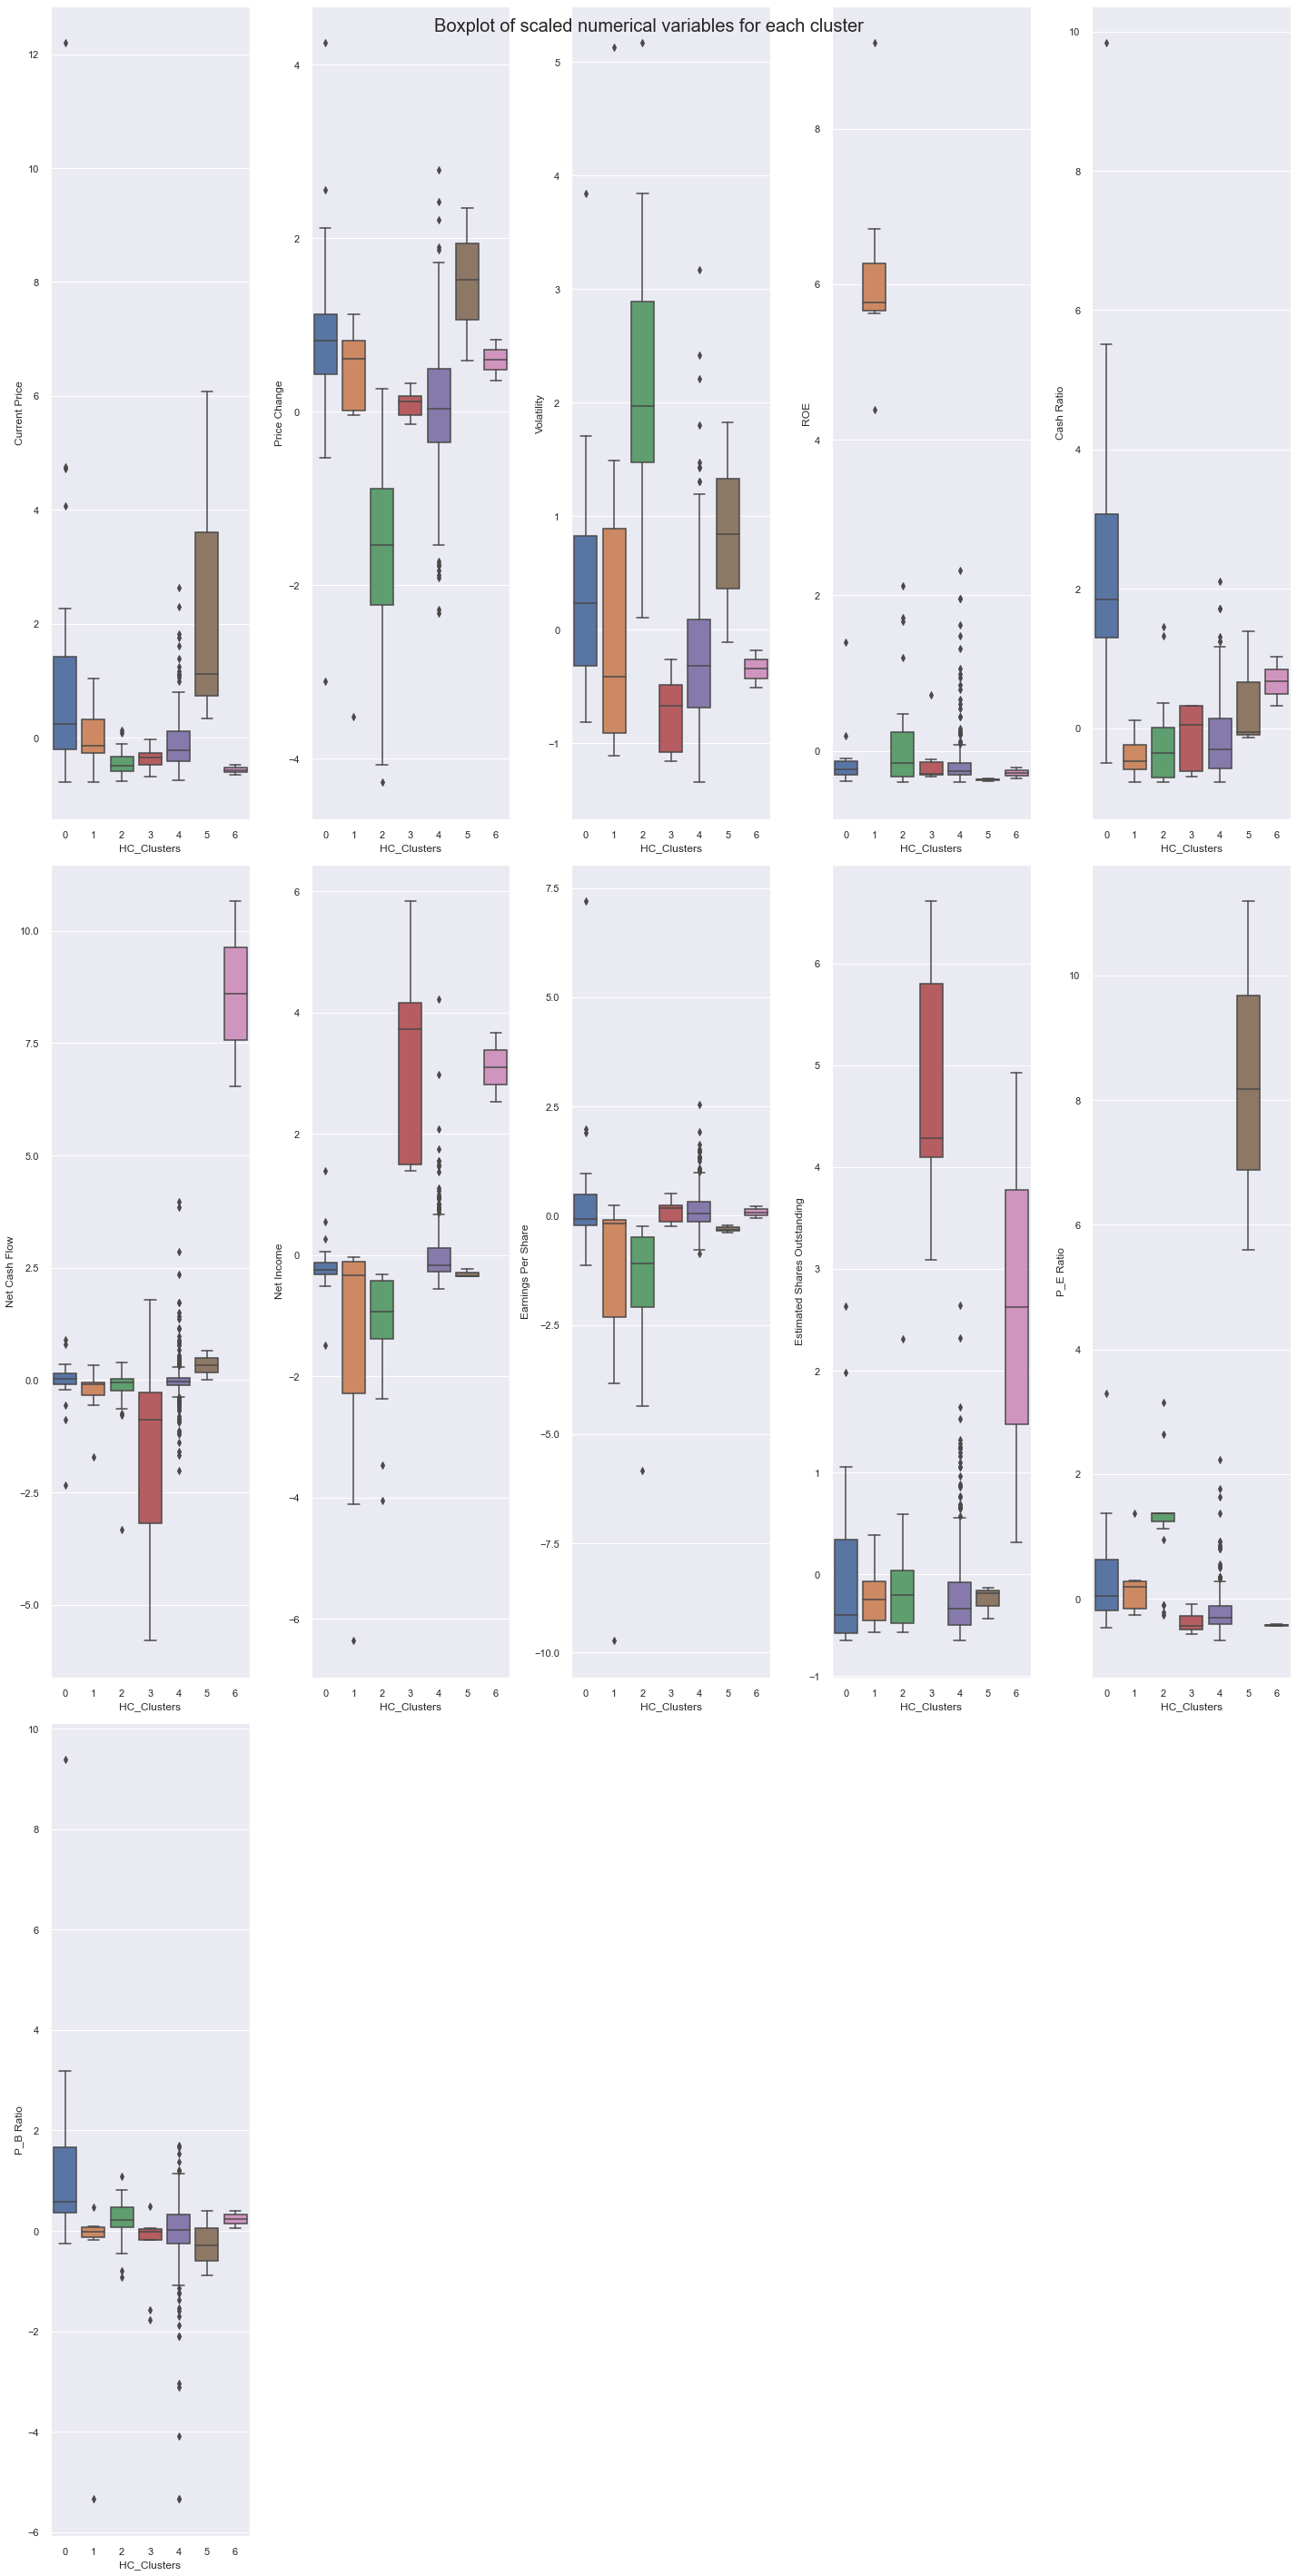

In [195]:

plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for  i, ii in enumerate(range(11)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    plt.tight_layout()

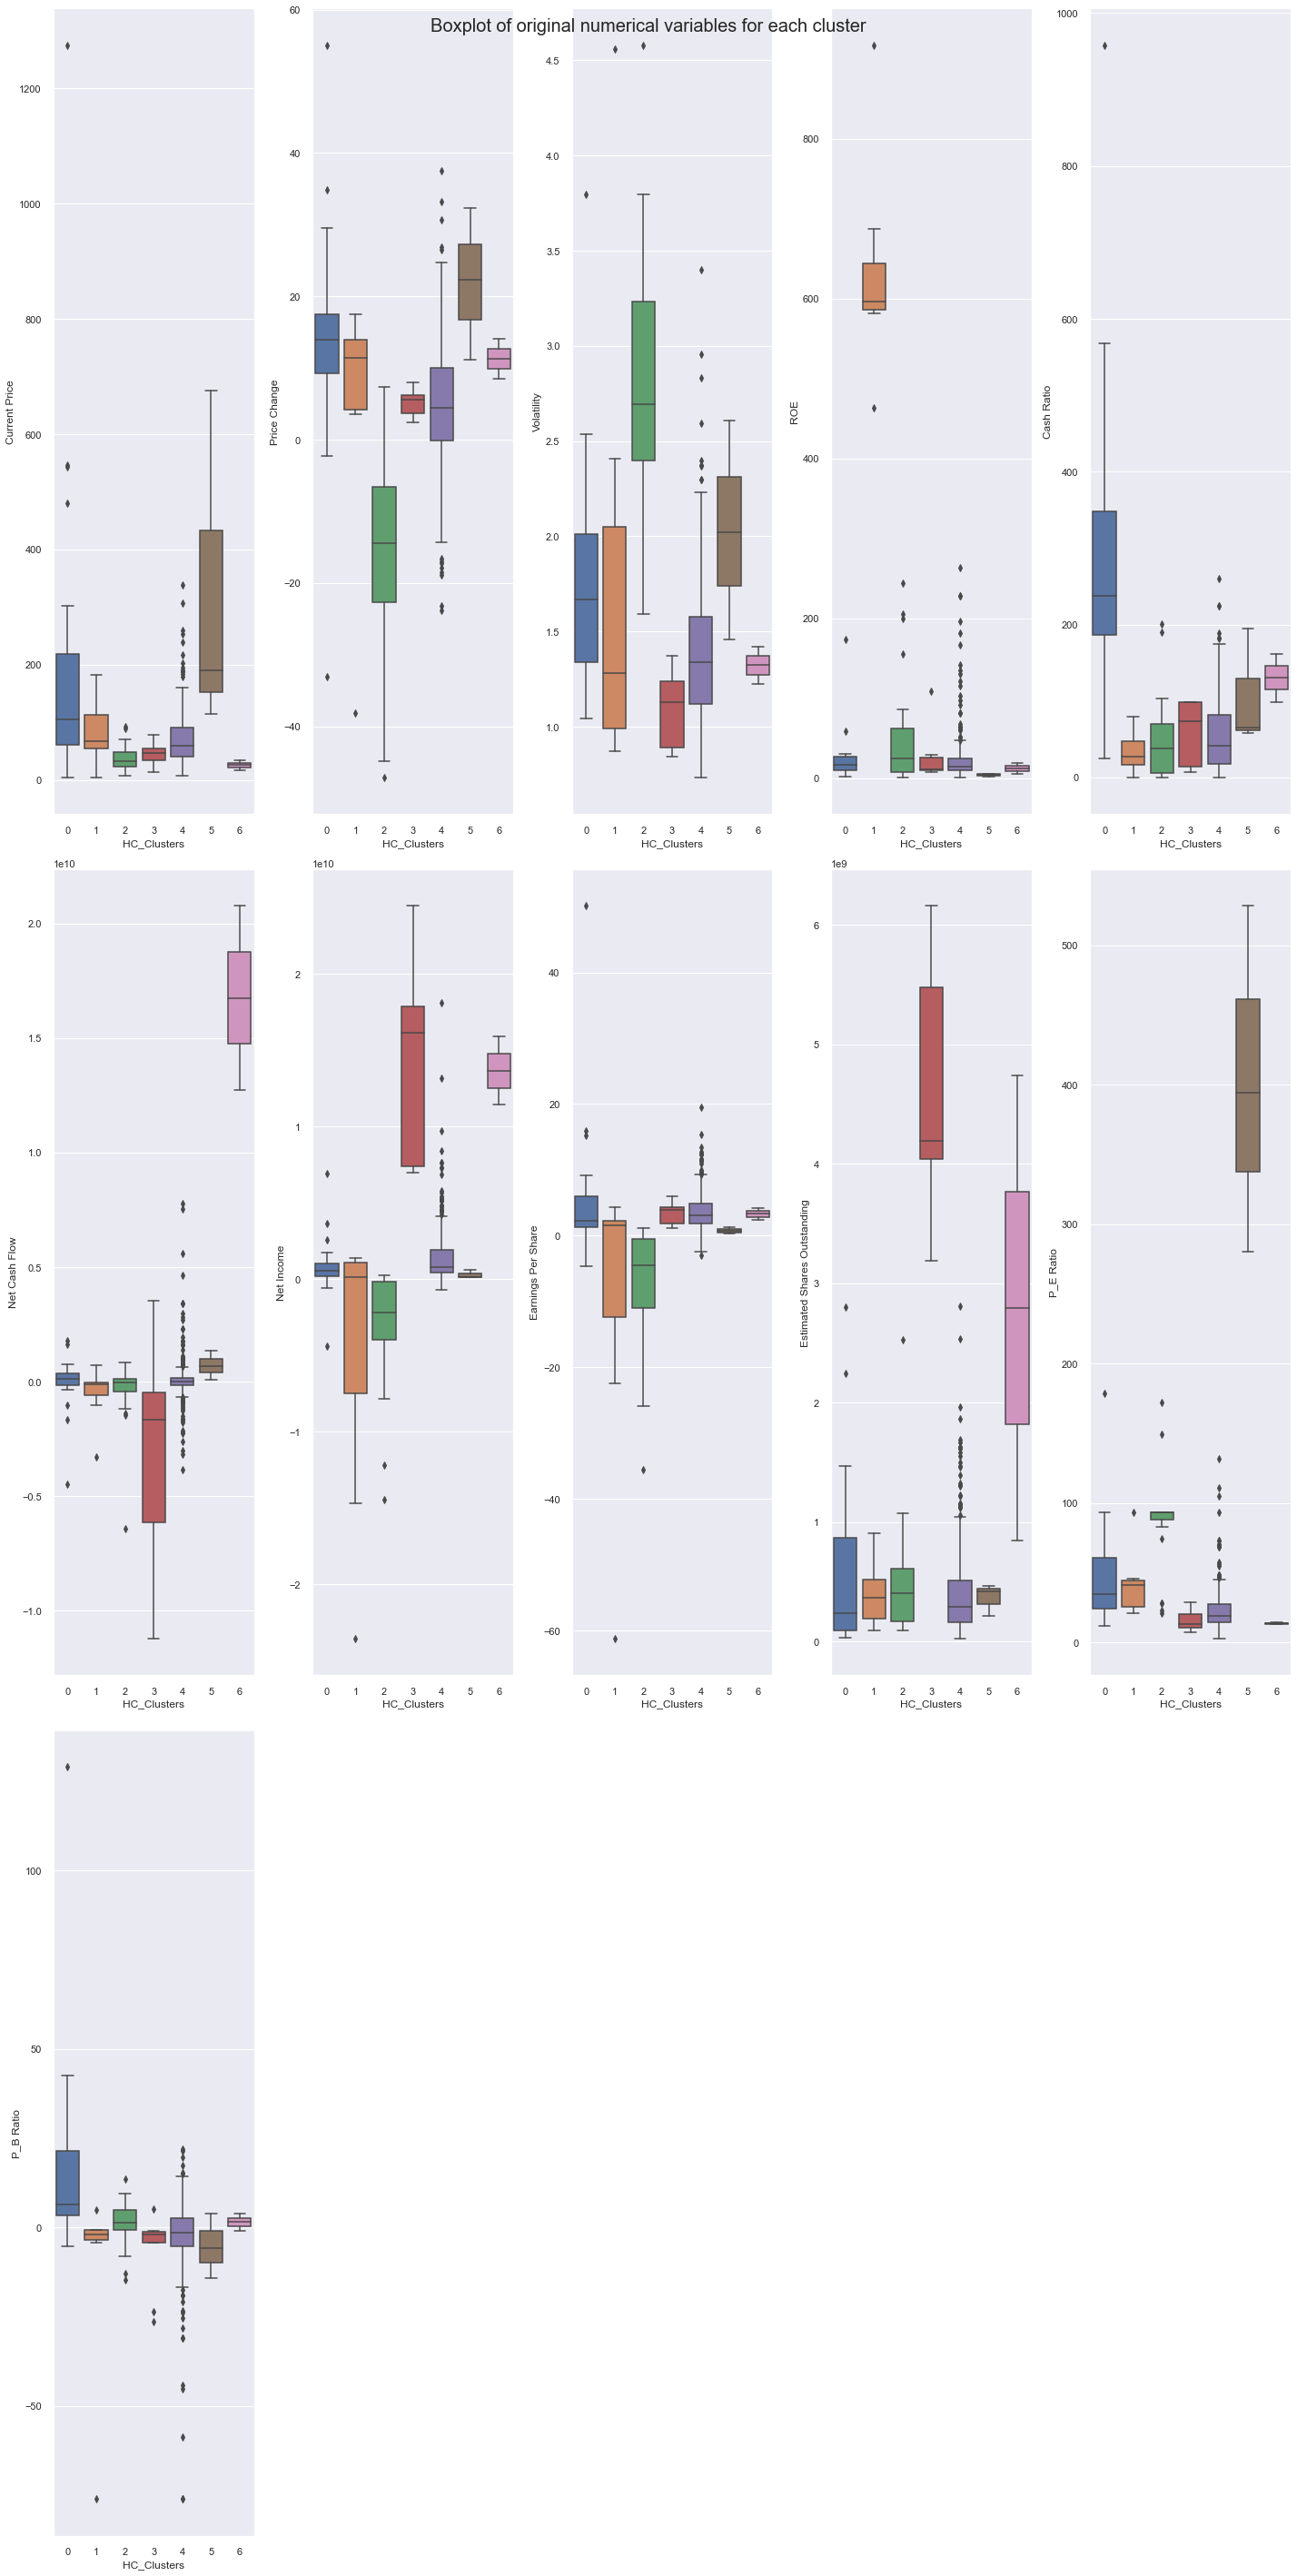

In [196]:
plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for  i, ii in enumerate(range(11)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(
        y=data[num_col[counter]],
        x=data["HC_Clusters"],
    )
    counter = counter + 1
    plt.tight_layout()

## Insights
- **Cluster 0**:
 - This cluster contains stocks with a median price of approximately \\$73.
 - Price change of about \\$5 in last 13 weeks and less volatility of about 1.3.
 - The Earning per share is 3.78  and P/E ratio  is 23 , which is good and P/B ration is -negative indicating the shares are   
   undervalued.
 - Has the highest number of stocks among all clusters.   
- **Cluster 1**:
 - This cluster contains stocks with a median price of approximately \\$84.
 - Price change of about \\$4 in last 13 weeks and less volatility of about 1.8.
 - The Earning per share is -10.8  and P/E ratio  is 42 , which is high(indication high growth) and P/B ration is -negative 
   indicating the shares are undervalued.
 - Has the highest ROE among all clusters.
- **Cluster 2**:
 - This cluster contains stocks with a median price of approximately \\$91 .
 - Price change of about \\$16 in last 13 weeks and less volatility of about 1.8.
 - The Earning per share is 2.1  and P/E ratio  is 46 , which is high(indication high growth) and P/B ration is positive 9 
   indicating the shares are almost correctly valued.
 - Has the highest Cash Ratio among all clusters.
- **Cluster 3**:
 - This cluster contains stocks with a median price of approximately \\$624 which is the highest average.
 - Price change of about \\$2.3 in last 13 weeks and less volatility of about 1.5.
 - The Earning per share is 19.2  and P/E ratio  is 42 , which is high(indication high growth) and P/B ration is positive 41 
   indicating the shares are over valued.The hignest P/B ratio among all the clusters.
- **Cluster 4**:
 - This cluster contains stocks with a median price of approximately \\$34.
 - Price change of about -\\$15 in last 13 weeks and volatility of about 2.8, the highest among all the clusters.
 - The Earning per share is -6  and P/E ratio  is 76 , which is high(indication high growth) and P/B ration  is positive 9 
   indicating the shares are almost correctly valued.
 - Has the second highest number of stocks among all clusters.
- **Cluster 5**:
 - This cluster contains stocks with a median price of approximately \\$46.
 - Price change of about \\$5 in last 13 weeks and less volatility of about 1, the lowest among all clusters.
 - The Earning per share is 3.4  and P/E ratio  is 15 , which is good and P/B ration is -negative indicating the shares are   
  undervalued.
 - Has the highest Net Income and Estimated Shares Outstanding among all clusters. 
- **Cluster 6**:
 - This cluster contains stocks with a median price of approximately \\$327.
 - Price change of about \\$21 in last 13 weeks and volatility of about 2.
 - The Earning per share is .75  and P/E ratio  is 400 , which is too high and P/B ration is -negative indicating the shares 
   are undervalued.
 - Has the P/E ratio among all clusters. 

## K-means vs Hierarchical Clustering

- K-means we took 8 clusters and Hierarchical clustering we took 7 clusters.
- Looking at the clusters both the models reveal similar cluster information like P/E ratio matches between the K-means and Hierarchical clusters

## Actionable Insights and Recommendations

- Cluster 6 from K-means is promising. Has less volatility and good P/E and P/B ratio.
- Cluster 5 from Hierarchical cluster is also promising. Has less volatility and good P/E and P/B ratio.  

 
- Cluster 3 from K-means is stable cluster. Has less volatility and good P/E and P/B ratio.
- Cluster 0 from Hierarchical cluster is also stable cluster. Has less volatility and good P/E and P/B ratio.  

 
- Cluster 0 from K-means has less volatility and high price change, indication the prices moves often
- Cluster 2 from Hierarchical cluster has less volatility and high price change, indication the prices moves often.  

 
- Cluster 5 from K-means has negative price change.
- Cluster 4 from Hierarchical cluster has negative price change.  

 
- Cluster 6 from Hierarchical clusters has high P/E and high price change may not be a good investment vehicle.
- Likewise, Cluster 7 from K-means has high P/E and high price change may not be a good investment vehicle.

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [197]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [198]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.37836198332699145

- The first four  principal components explain 58.5% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

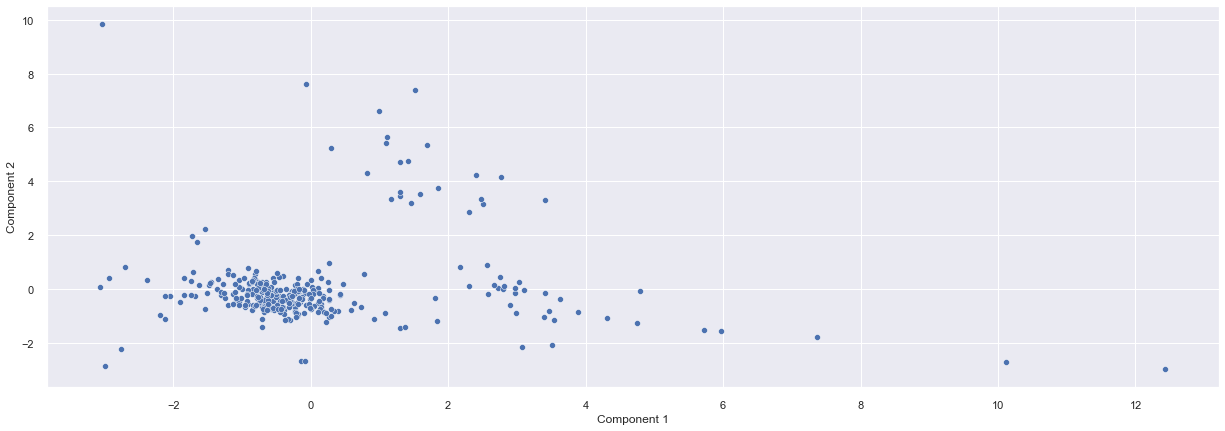

In [199]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

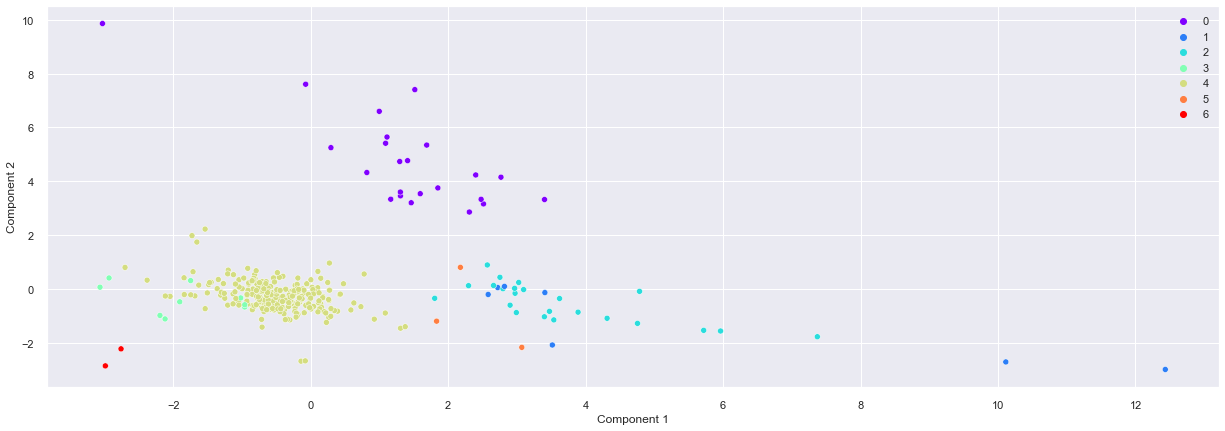

In [200]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))